In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [4]:
df.head()
df.to_csv('./main_clearNull.csv')

In [5]:
df['_HSCD'] = df['HSCD'].copy()

In [6]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,104,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,124,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [7]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [8]:
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


<AxesSubplot:>

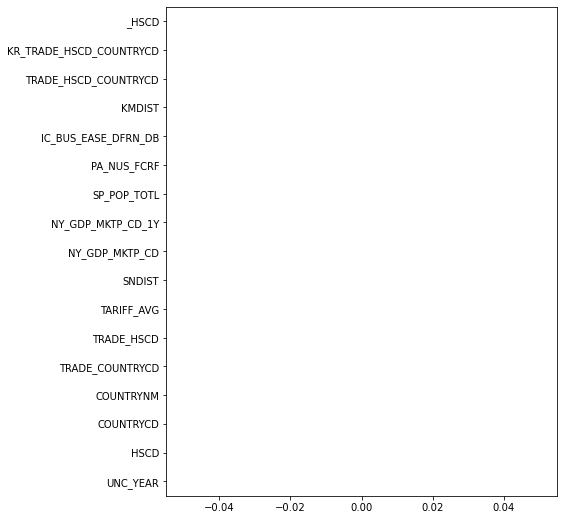

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 17)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,...,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590,0.007418,0.017537,106.355199,0.224130
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,...,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590,0.192061,2.252181,109.954916,1.206797
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,...,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590,0.020783,0.160822,114.876093,0.392121
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,...,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590,0.066283,0.065509,102.622089,4.945077
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,...,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893


In [13]:
copy_df = df.copy()

In [14]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
copy_df = df.copy()
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,30.0,38.782384,0.027670,110.973017,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,1,2,0.0,122.031560,0.015534,1.304758,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
4,1,3,18.0,96.442069,0.147996,3.191389,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121
5,1,4,5.0,58.916600,0.036340,1360.358707,42.671390,37.961426,0.066283,0.065509,102.622089,4.945077
6,1,5,0.0,79.117838,0.024167,1.297936,79.540940,106.177031,0.257627,5.718352,107.959483,0.652893


In [16]:
df.to_csv('./norm.csv')

In [17]:
# copy_df = df.copy()

In [18]:
# copy_df.head()

In [19]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [21]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [22]:
y_test = y_test.reshape(-1,1)

In [23]:
len(df)

17269

In [24]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [25]:
y_test.shape

torch.Size([3454, 1])

In [26]:
# LSTM Model Test
import torch.nn as nn

sequence_length = x_train.shape[1]
input_size = x_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 1
batch_size = 128

learning_rate = 0.01
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__() # 상속한 nn.Module에서 RNN에 해당하는 init 실행
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (BATCH SIZE, SEQ_LENGTH, HIDDEN_SIZE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # hidden state와 동일

        out, _ = self.lstm(x, (h0, c0)) # output : (BATCH_SIZE, SEQ_LENGTH, HIDDEN_SIZE) tensors. (hn, cn)은 필요 없으므로 받지 않고 _로 처리합니다. 

        out = self.fc(out[:, -1, :])
        return out
    
class DeepModel(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel, self).__init__()

        self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.bn2 = nn.BatchNorm1d(64)
        self.head = nn.Linear(64, out_channel)

    def forward(self, x):
        x = x.to(device)
        x = self.basic(x)
        x = F.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        return self.head(x)

modelLinear = nn.Linear(x_train.shape[1], 1).to(device)



# model = nn.Linear(9,1).to(device)


# MODEL LOAD FINISH
# MODEL LOAD FINISH
# MODEL LOAD FINISH

# LSTM - L1 Loss Model

In [27]:


# LSTM
deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

num_epochs = 100
total_step = len(dataloader)
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        x_t = x_t.reshape(-1, 1, input_size)

        pred = deepmodel(x_t)
        
#         loss = F.mse_loss(y_t, pred)
        loss = F.l1_loss(y_t, pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0: 
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')



Epoch [1/100], Step [100/216], Loss: 8.0282
Epoch [1/100], Step [200/216], Loss: 3.0026
Epoch [2/100], Step [100/216], Loss: 5.4775
Epoch [2/100], Step [200/216], Loss: 11.6879
Epoch [3/100], Step [100/216], Loss: 4.3858
Epoch [3/100], Step [200/216], Loss: 3.3664
Epoch [4/100], Step [100/216], Loss: 4.3937
Epoch [4/100], Step [200/216], Loss: 3.8136
Epoch [5/100], Step [100/216], Loss: 5.1153
Epoch [5/100], Step [200/216], Loss: 5.6560
Epoch [6/100], Step [100/216], Loss: 3.4423


KeyboardInterrupt: 

In [ ]:
x_te = x_test.reshape(-1,1,input_size)
pred_y = deepmodel(x_te)
torch.mean(torch.abs(pred_y - y_test))

# L2 Loss model

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [ ]:
n_epochs = 200
loss_list1 = []
test_loss_list1 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel(x_t).to(device)
        cost = F.mse_loss(y_t, pred)
        loss_list1.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list1.append(F.mse_loss(pred_y, y_test))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')

# l1 loss model

In [49]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [50]:
n_epochs = 100
loss_list2 = []
test_loss_list2 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel2(x_t).to(device)
        cost = F.l1_loss(y_t, pred)
        loss_list2.append(cost)
        with torch.no_grad():
            pred_y = deepmodel2(x_test)
            test_loss_list2.append(F.l1_loss(pred_y, y_test))
        optimizer2.zero_grad()
        cost.backward()
        optimizer2.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/216  cost : 52.18222427368164
Ep 0/100  Batch 2/216  cost : 34.30939865112305
Ep 0/100  Batch 3/216  cost : 77.73844909667969
Ep 0/100  Batch 4/216  cost : 42.955928802490234
Ep 0/100  Batch 5/216  cost : 37.676300048828125
Ep 0/100  Batch 6/216  cost : 30.43049430847168
Ep 0/100  Batch 7/216  cost : 32.08729553222656
Ep 0/100  Batch 8/216  cost : 32.676979064941406
Ep 0/100  Batch 9/216  cost : 32.20475769042969
Ep 0/100  Batch 10/216  cost : 52.48396301269531
Ep 0/100  Batch 11/216  cost : 52.19681167602539
Ep 0/100  Batch 12/216  cost : 48.46503448486328
Ep 0/100  Batch 13/216  cost : 61.063045501708984
Ep 0/100  Batch 14/216  cost : 56.80970764160156
Ep 0/100  Batch 15/216  cost : 39.37324523925781
Ep 0/100  Batch 16/216  cost : 51.39398193359375
Ep 0/100  Batch 17/216  cost : 36.1755485534668
Ep 0/100  Batch 18/216  cost : 33.713905334472656
Ep 0/100  Batch 19/216  cost : 23.24115753173828
Ep 0/100  Batch 20/216  cost : 36.436424255371094
Ep 0/100  Batch 21/216  

Ep 1/100  Batch 13/216  cost : 5.854720115661621
Ep 1/100  Batch 14/216  cost : 8.57458209991455
Ep 1/100  Batch 15/216  cost : 3.656966209411621
Ep 1/100  Batch 16/216  cost : 3.664520502090454
Ep 1/100  Batch 17/216  cost : 5.843595504760742
Ep 1/100  Batch 18/216  cost : 2.7829368114471436
Ep 1/100  Batch 19/216  cost : 4.45093297958374
Ep 1/100  Batch 20/216  cost : 5.050202369689941
Ep 1/100  Batch 21/216  cost : 4.556044101715088
Ep 1/100  Batch 22/216  cost : 20.082321166992188
Ep 1/100  Batch 23/216  cost : 4.0113301277160645
Ep 1/100  Batch 24/216  cost : 3.4485344886779785
Ep 1/100  Batch 25/216  cost : 2.7239646911621094
Ep 1/100  Batch 26/216  cost : 6.912589073181152
Ep 1/100  Batch 27/216  cost : 8.496482849121094
Ep 1/100  Batch 28/216  cost : 5.302624225616455
Ep 1/100  Batch 29/216  cost : 4.942106246948242
Ep 1/100  Batch 30/216  cost : 2.509087562561035
Ep 1/100  Batch 31/216  cost : 4.826778411865234
Ep 1/100  Batch 32/216  cost : 9.071881294250488
Ep 1/100  Batch 3

Ep 2/100  Batch 22/216  cost : 5.195133209228516
Ep 2/100  Batch 23/216  cost : 4.589278221130371
Ep 2/100  Batch 24/216  cost : 7.009158134460449
Ep 2/100  Batch 25/216  cost : 2.832390308380127
Ep 2/100  Batch 26/216  cost : 5.263543128967285
Ep 2/100  Batch 27/216  cost : 4.064868450164795
Ep 2/100  Batch 28/216  cost : 4.177089691162109
Ep 2/100  Batch 29/216  cost : 2.249232292175293
Ep 2/100  Batch 30/216  cost : 6.260721206665039
Ep 2/100  Batch 31/216  cost : 3.077031135559082
Ep 2/100  Batch 32/216  cost : 3.0673935413360596
Ep 2/100  Batch 33/216  cost : 4.305830955505371
Ep 2/100  Batch 34/216  cost : 8.109909057617188
Ep 2/100  Batch 35/216  cost : 5.6803483963012695
Ep 2/100  Batch 36/216  cost : 4.699569225311279
Ep 2/100  Batch 37/216  cost : 4.366549968719482
Ep 2/100  Batch 38/216  cost : 11.670052528381348
Ep 2/100  Batch 39/216  cost : 6.356433391571045
Ep 2/100  Batch 40/216  cost : 3.281202793121338
Ep 2/100  Batch 41/216  cost : 5.40126895904541
Ep 2/100  Batch 42

Ep 3/100  Batch 34/216  cost : 3.1961328983306885
Ep 3/100  Batch 35/216  cost : 4.44722318649292
Ep 3/100  Batch 36/216  cost : 3.9308841228485107
Ep 3/100  Batch 37/216  cost : 3.074568271636963
Ep 3/100  Batch 38/216  cost : 5.351759910583496
Ep 3/100  Batch 39/216  cost : 3.6206977367401123
Ep 3/100  Batch 40/216  cost : 12.621980667114258
Ep 3/100  Batch 41/216  cost : 2.9732766151428223
Ep 3/100  Batch 42/216  cost : 4.278491973876953
Ep 3/100  Batch 43/216  cost : 9.41307544708252
Ep 3/100  Batch 44/216  cost : 5.51179313659668
Ep 3/100  Batch 45/216  cost : 4.74446964263916
Ep 3/100  Batch 46/216  cost : 2.7694942951202393
Ep 3/100  Batch 47/216  cost : 3.602628231048584
Ep 3/100  Batch 48/216  cost : 2.751516819000244
Ep 3/100  Batch 49/216  cost : 4.335772514343262
Ep 3/100  Batch 50/216  cost : 13.707911491394043
Ep 3/100  Batch 51/216  cost : 3.5125956535339355
Ep 3/100  Batch 52/216  cost : 4.479211807250977
Ep 3/100  Batch 53/216  cost : 3.663119077682495
Ep 3/100  Batch 

Ep 4/100  Batch 46/216  cost : 3.7372446060180664
Ep 4/100  Batch 47/216  cost : 55.866451263427734
Ep 4/100  Batch 48/216  cost : 3.6162476539611816
Ep 4/100  Batch 49/216  cost : 3.727534532546997
Ep 4/100  Batch 50/216  cost : 6.162931442260742
Ep 4/100  Batch 51/216  cost : 3.430302619934082
Ep 4/100  Batch 52/216  cost : 9.472841262817383
Ep 4/100  Batch 53/216  cost : 2.8446297645568848
Ep 4/100  Batch 54/216  cost : 4.759727954864502
Ep 4/100  Batch 55/216  cost : 4.689723968505859
Ep 4/100  Batch 56/216  cost : 4.395270824432373
Ep 4/100  Batch 57/216  cost : 4.028257846832275
Ep 4/100  Batch 58/216  cost : 8.303791046142578
Ep 4/100  Batch 59/216  cost : 4.286056041717529
Ep 4/100  Batch 60/216  cost : 4.425197124481201
Ep 4/100  Batch 61/216  cost : 4.294811248779297
Ep 4/100  Batch 62/216  cost : 4.100607872009277
Ep 4/100  Batch 63/216  cost : 2.9382834434509277
Ep 4/100  Batch 64/216  cost : 3.655182361602783
Ep 4/100  Batch 65/216  cost : 4.0612921714782715
Ep 4/100  Batc

Ep 5/100  Batch 57/216  cost : 5.604401588439941
Ep 5/100  Batch 58/216  cost : 3.141252279281616
Ep 5/100  Batch 59/216  cost : 4.58122444152832
Ep 5/100  Batch 60/216  cost : 4.857317924499512
Ep 5/100  Batch 61/216  cost : 4.86862325668335
Ep 5/100  Batch 62/216  cost : 3.924309730529785
Ep 5/100  Batch 63/216  cost : 3.102530002593994
Ep 5/100  Batch 64/216  cost : 6.480739116668701
Ep 5/100  Batch 65/216  cost : 6.7375030517578125
Ep 5/100  Batch 66/216  cost : 5.165459632873535
Ep 5/100  Batch 67/216  cost : 6.819817543029785
Ep 5/100  Batch 68/216  cost : 2.8898987770080566
Ep 5/100  Batch 69/216  cost : 3.006587028503418
Ep 5/100  Batch 70/216  cost : 4.019930839538574
Ep 5/100  Batch 71/216  cost : 5.500795841217041
Ep 5/100  Batch 72/216  cost : 5.638423442840576
Ep 5/100  Batch 73/216  cost : 8.870848655700684
Ep 5/100  Batch 74/216  cost : 3.437758684158325
Ep 5/100  Batch 75/216  cost : 12.514404296875
Ep 5/100  Batch 76/216  cost : 4.635417938232422
Ep 5/100  Batch 77/216

Ep 6/100  Batch 66/216  cost : 5.814009189605713
Ep 6/100  Batch 67/216  cost : 8.021356582641602
Ep 6/100  Batch 68/216  cost : 3.5477516651153564
Ep 6/100  Batch 69/216  cost : 7.841538906097412
Ep 6/100  Batch 70/216  cost : 3.959459066390991
Ep 6/100  Batch 71/216  cost : 4.87149715423584
Ep 6/100  Batch 72/216  cost : 5.104660987854004
Ep 6/100  Batch 73/216  cost : 4.562542915344238
Ep 6/100  Batch 74/216  cost : 2.8201422691345215
Ep 6/100  Batch 75/216  cost : 4.345590114593506
Ep 6/100  Batch 76/216  cost : 8.470230102539062
Ep 6/100  Batch 77/216  cost : 4.964843273162842
Ep 6/100  Batch 78/216  cost : 6.038830280303955
Ep 6/100  Batch 79/216  cost : 11.484289169311523
Ep 6/100  Batch 80/216  cost : 6.4320478439331055
Ep 6/100  Batch 81/216  cost : 8.40549373626709
Ep 6/100  Batch 82/216  cost : 5.4348602294921875
Ep 6/100  Batch 83/216  cost : 2.8828017711639404
Ep 6/100  Batch 84/216  cost : 6.77869987487793
Ep 6/100  Batch 85/216  cost : 4.314488887786865
Ep 6/100  Batch 8

Ep 7/100  Batch 78/216  cost : 8.341575622558594
Ep 7/100  Batch 79/216  cost : 2.71868896484375
Ep 7/100  Batch 80/216  cost : 2.9671554565429688
Ep 7/100  Batch 81/216  cost : 4.409223556518555
Ep 7/100  Batch 82/216  cost : 5.336172103881836
Ep 7/100  Batch 83/216  cost : 2.71311616897583
Ep 7/100  Batch 84/216  cost : 43.2652587890625
Ep 7/100  Batch 85/216  cost : 2.298186779022217
Ep 7/100  Batch 86/216  cost : 4.496864318847656
Ep 7/100  Batch 87/216  cost : 9.087519645690918
Ep 7/100  Batch 88/216  cost : 6.473594665527344
Ep 7/100  Batch 89/216  cost : 4.283745765686035
Ep 7/100  Batch 90/216  cost : 4.485366344451904
Ep 7/100  Batch 91/216  cost : 4.301959991455078
Ep 7/100  Batch 92/216  cost : 1.5310475826263428
Ep 7/100  Batch 93/216  cost : 8.390833854675293
Ep 7/100  Batch 94/216  cost : 4.967853546142578
Ep 7/100  Batch 95/216  cost : 5.061025619506836
Ep 7/100  Batch 96/216  cost : 3.8697426319122314
Ep 7/100  Batch 97/216  cost : 5.162914752960205
Ep 7/100  Batch 98/2

Ep 8/100  Batch 82/216  cost : 3.9705100059509277
Ep 8/100  Batch 83/216  cost : 4.244008541107178
Ep 8/100  Batch 84/216  cost : 5.494789123535156
Ep 8/100  Batch 85/216  cost : 5.219791412353516
Ep 8/100  Batch 86/216  cost : 4.768205165863037
Ep 8/100  Batch 87/216  cost : 57.277008056640625
Ep 8/100  Batch 88/216  cost : 3.627196788787842
Ep 8/100  Batch 89/216  cost : 5.6462507247924805
Ep 8/100  Batch 90/216  cost : 5.664557456970215
Ep 8/100  Batch 91/216  cost : 8.28046989440918
Ep 8/100  Batch 92/216  cost : 7.251053333282471
Ep 8/100  Batch 93/216  cost : 4.248241424560547
Ep 8/100  Batch 94/216  cost : 5.020306587219238
Ep 8/100  Batch 95/216  cost : 3.340752601623535
Ep 8/100  Batch 96/216  cost : 4.7134199142456055
Ep 8/100  Batch 97/216  cost : 5.4963226318359375
Ep 8/100  Batch 98/216  cost : 3.421475410461426
Ep 8/100  Batch 99/216  cost : 4.169856071472168
Ep 8/100  Batch 100/216  cost : 6.174605369567871
Ep 8/100  Batch 101/216  cost : 4.139472961425781
Ep 8/100  Batc

Ep 9/100  Batch 87/216  cost : 5.773475646972656
Ep 9/100  Batch 88/216  cost : 5.673384666442871
Ep 9/100  Batch 89/216  cost : 55.15696716308594
Ep 9/100  Batch 90/216  cost : 4.238273620605469
Ep 9/100  Batch 91/216  cost : 5.72947359085083
Ep 9/100  Batch 92/216  cost : 3.6354146003723145
Ep 9/100  Batch 93/216  cost : 6.744898319244385
Ep 9/100  Batch 94/216  cost : 3.381108045578003
Ep 9/100  Batch 95/216  cost : 3.5366415977478027
Ep 9/100  Batch 96/216  cost : 3.827244758605957
Ep 9/100  Batch 97/216  cost : 3.9230072498321533
Ep 9/100  Batch 98/216  cost : 3.1489152908325195
Ep 9/100  Batch 99/216  cost : 4.464237213134766
Ep 9/100  Batch 100/216  cost : 4.353010177612305
Ep 9/100  Batch 101/216  cost : 8.60982894897461
Ep 9/100  Batch 102/216  cost : 7.599516868591309
Ep 9/100  Batch 103/216  cost : 3.2084641456604004
Ep 9/100  Batch 104/216  cost : 3.8593389987945557
Ep 9/100  Batch 105/216  cost : 3.557292938232422
Ep 9/100  Batch 106/216  cost : 5.124798774719238
Ep 9/100 

Ep 10/100  Batch 91/216  cost : 2.9274330139160156
Ep 10/100  Batch 92/216  cost : 4.9754791259765625
Ep 10/100  Batch 93/216  cost : 4.0417938232421875
Ep 10/100  Batch 94/216  cost : 55.3937873840332
Ep 10/100  Batch 95/216  cost : 4.260761260986328
Ep 10/100  Batch 96/216  cost : 3.2989583015441895
Ep 10/100  Batch 97/216  cost : 9.038597106933594
Ep 10/100  Batch 98/216  cost : 5.05525541305542
Ep 10/100  Batch 99/216  cost : 9.973091125488281
Ep 10/100  Batch 100/216  cost : 5.048506259918213
Ep 10/100  Batch 101/216  cost : 5.103443622589111
Ep 10/100  Batch 102/216  cost : 5.409602165222168
Ep 10/100  Batch 103/216  cost : 4.0416059494018555
Ep 10/100  Batch 104/216  cost : 11.563899993896484
Ep 10/100  Batch 105/216  cost : 5.752524375915527
Ep 10/100  Batch 106/216  cost : 4.585166931152344
Ep 10/100  Batch 107/216  cost : 3.1441283226013184
Ep 10/100  Batch 108/216  cost : 3.4204139709472656
Ep 10/100  Batch 109/216  cost : 5.4614105224609375
Ep 10/100  Batch 110/216  cost : 

Ep 11/100  Batch 94/216  cost : 3.583838701248169
Ep 11/100  Batch 95/216  cost : 5.0171098709106445
Ep 11/100  Batch 96/216  cost : 4.405212879180908
Ep 11/100  Batch 97/216  cost : 3.9369618892669678
Ep 11/100  Batch 98/216  cost : 4.716797351837158
Ep 11/100  Batch 99/216  cost : 5.3470048904418945
Ep 11/100  Batch 100/216  cost : 3.5409936904907227
Ep 11/100  Batch 101/216  cost : 4.246480941772461
Ep 11/100  Batch 102/216  cost : 3.2263522148132324
Ep 11/100  Batch 103/216  cost : 4.442339897155762
Ep 11/100  Batch 104/216  cost : 6.510014533996582
Ep 11/100  Batch 105/216  cost : 6.491189479827881
Ep 11/100  Batch 106/216  cost : 4.1260666847229
Ep 11/100  Batch 107/216  cost : 3.7202858924865723
Ep 11/100  Batch 108/216  cost : 5.314526557922363
Ep 11/100  Batch 109/216  cost : 3.424030303955078
Ep 11/100  Batch 110/216  cost : 2.557413101196289
Ep 11/100  Batch 111/216  cost : 5.965505123138428
Ep 11/100  Batch 112/216  cost : 6.076786041259766
Ep 11/100  Batch 113/216  cost : 

Ep 12/100  Batch 98/216  cost : 5.388641834259033
Ep 12/100  Batch 99/216  cost : 3.92938494682312
Ep 12/100  Batch 100/216  cost : 4.427961826324463
Ep 12/100  Batch 101/216  cost : 2.4698715209960938
Ep 12/100  Batch 102/216  cost : 3.8053512573242188
Ep 12/100  Batch 103/216  cost : 2.670405864715576
Ep 12/100  Batch 104/216  cost : 3.8106353282928467
Ep 12/100  Batch 105/216  cost : 4.5630292892456055
Ep 12/100  Batch 106/216  cost : 4.383238315582275
Ep 12/100  Batch 107/216  cost : 4.8932623863220215
Ep 12/100  Batch 108/216  cost : 5.486317157745361
Ep 12/100  Batch 109/216  cost : 2.1235342025756836
Ep 12/100  Batch 110/216  cost : 4.564471244812012
Ep 12/100  Batch 111/216  cost : 9.624391555786133
Ep 12/100  Batch 112/216  cost : 3.753085136413574
Ep 12/100  Batch 113/216  cost : 5.044643402099609
Ep 12/100  Batch 114/216  cost : 4.917124271392822
Ep 12/100  Batch 115/216  cost : 3.467884063720703
Ep 12/100  Batch 116/216  cost : 4.108124732971191
Ep 12/100  Batch 117/216  co

Ep 13/100  Batch 101/216  cost : 3.884514331817627
Ep 13/100  Batch 102/216  cost : 5.228395462036133
Ep 13/100  Batch 103/216  cost : 3.8462233543395996
Ep 13/100  Batch 104/216  cost : 4.115071773529053
Ep 13/100  Batch 105/216  cost : 6.324249744415283
Ep 13/100  Batch 106/216  cost : 5.921265602111816
Ep 13/100  Batch 107/216  cost : 13.608530044555664
Ep 13/100  Batch 108/216  cost : 3.7837300300598145
Ep 13/100  Batch 109/216  cost : 4.842800617218018
Ep 13/100  Batch 110/216  cost : 9.233646392822266
Ep 13/100  Batch 111/216  cost : 3.6387529373168945
Ep 13/100  Batch 112/216  cost : 4.939975738525391
Ep 13/100  Batch 113/216  cost : 4.5583930015563965
Ep 13/100  Batch 114/216  cost : 3.8410091400146484
Ep 13/100  Batch 115/216  cost : 3.630324363708496
Ep 13/100  Batch 116/216  cost : 7.589693069458008
Ep 13/100  Batch 117/216  cost : 5.5749616622924805
Ep 13/100  Batch 118/216  cost : 6.351326942443848
Ep 13/100  Batch 119/216  cost : 3.314112663269043
Ep 13/100  Batch 120/216

Ep 14/100  Batch 104/216  cost : 4.249201774597168
Ep 14/100  Batch 105/216  cost : 2.4071528911590576
Ep 14/100  Batch 106/216  cost : 3.4489424228668213
Ep 14/100  Batch 107/216  cost : 3.2485427856445312
Ep 14/100  Batch 108/216  cost : 4.212864875793457
Ep 14/100  Batch 109/216  cost : 3.632765293121338
Ep 14/100  Batch 110/216  cost : 2.2279186248779297
Ep 14/100  Batch 111/216  cost : 8.737460136413574
Ep 14/100  Batch 112/216  cost : 4.589113235473633
Ep 14/100  Batch 113/216  cost : 4.675708770751953
Ep 14/100  Batch 114/216  cost : 5.664181709289551
Ep 14/100  Batch 115/216  cost : 5.2594499588012695
Ep 14/100  Batch 116/216  cost : 9.37957763671875
Ep 14/100  Batch 117/216  cost : 1.544181227684021
Ep 14/100  Batch 118/216  cost : 3.5124642848968506
Ep 14/100  Batch 119/216  cost : 5.499773025512695
Ep 14/100  Batch 120/216  cost : 4.327730178833008
Ep 14/100  Batch 121/216  cost : 3.9114761352539062
Ep 14/100  Batch 122/216  cost : 5.092472076416016
Ep 14/100  Batch 123/216 

Ep 15/100  Batch 107/216  cost : 6.147093772888184
Ep 15/100  Batch 108/216  cost : 6.494987487792969
Ep 15/100  Batch 109/216  cost : 6.215801239013672
Ep 15/100  Batch 110/216  cost : 4.238125801086426
Ep 15/100  Batch 111/216  cost : 4.58917236328125
Ep 15/100  Batch 112/216  cost : 1.6839364767074585
Ep 15/100  Batch 113/216  cost : 3.1259522438049316
Ep 15/100  Batch 114/216  cost : 5.413819313049316
Ep 15/100  Batch 115/216  cost : 14.050920486450195
Ep 15/100  Batch 116/216  cost : 5.953397750854492
Ep 15/100  Batch 117/216  cost : 3.2457995414733887
Ep 15/100  Batch 118/216  cost : 3.264224052429199
Ep 15/100  Batch 119/216  cost : 4.005954742431641
Ep 15/100  Batch 120/216  cost : 4.026411533355713
Ep 15/100  Batch 121/216  cost : 3.361316204071045
Ep 15/100  Batch 122/216  cost : 2.1251959800720215
Ep 15/100  Batch 123/216  cost : 3.59659481048584
Ep 15/100  Batch 124/216  cost : 2.3102874755859375
Ep 15/100  Batch 125/216  cost : 3.284905433654785
Ep 15/100  Batch 126/216  c

Ep 16/100  Batch 110/216  cost : 4.884163856506348
Ep 16/100  Batch 111/216  cost : 4.583409309387207
Ep 16/100  Batch 112/216  cost : 4.840823650360107
Ep 16/100  Batch 113/216  cost : 12.065590858459473
Ep 16/100  Batch 114/216  cost : 8.88033676147461
Ep 16/100  Batch 115/216  cost : 2.9189999103546143
Ep 16/100  Batch 116/216  cost : 2.9289052486419678
Ep 16/100  Batch 117/216  cost : 5.931564807891846
Ep 16/100  Batch 118/216  cost : 3.6931700706481934
Ep 16/100  Batch 119/216  cost : 3.8619210720062256
Ep 16/100  Batch 120/216  cost : 5.553158760070801
Ep 16/100  Batch 121/216  cost : 5.943600177764893
Ep 16/100  Batch 122/216  cost : 6.584285259246826
Ep 16/100  Batch 123/216  cost : 4.551290988922119
Ep 16/100  Batch 124/216  cost : 56.19113540649414
Ep 16/100  Batch 125/216  cost : 4.081370830535889
Ep 16/100  Batch 126/216  cost : 3.4792394638061523
Ep 16/100  Batch 127/216  cost : 5.650788307189941
Ep 16/100  Batch 128/216  cost : 5.917651176452637
Ep 16/100  Batch 129/216  

Ep 17/100  Batch 113/216  cost : 2.835092544555664
Ep 17/100  Batch 114/216  cost : 3.769906997680664
Ep 17/100  Batch 115/216  cost : 6.805258750915527
Ep 17/100  Batch 116/216  cost : 4.186123371124268
Ep 17/100  Batch 117/216  cost : 5.246474266052246
Ep 17/100  Batch 118/216  cost : 3.5661866664886475
Ep 17/100  Batch 119/216  cost : 4.425045967102051
Ep 17/100  Batch 120/216  cost : 4.292067050933838
Ep 17/100  Batch 121/216  cost : 4.606534957885742
Ep 17/100  Batch 122/216  cost : 13.53589916229248
Ep 17/100  Batch 123/216  cost : 5.011982440948486
Ep 17/100  Batch 124/216  cost : 9.07559585571289
Ep 17/100  Batch 125/216  cost : 5.596255302429199
Ep 17/100  Batch 126/216  cost : 4.37865686416626
Ep 17/100  Batch 127/216  cost : 3.0567469596862793
Ep 17/100  Batch 128/216  cost : 4.692739486694336
Ep 17/100  Batch 129/216  cost : 3.095890998840332
Ep 17/100  Batch 130/216  cost : 2.9074506759643555
Ep 17/100  Batch 131/216  cost : 4.005250930786133
Ep 17/100  Batch 132/216  cost

Ep 18/100  Batch 116/216  cost : 5.103605270385742
Ep 18/100  Batch 117/216  cost : 6.509711742401123
Ep 18/100  Batch 118/216  cost : 5.541269302368164
Ep 18/100  Batch 119/216  cost : 4.04106330871582
Ep 18/100  Batch 120/216  cost : 3.755324363708496
Ep 18/100  Batch 121/216  cost : 3.3575892448425293
Ep 18/100  Batch 122/216  cost : 4.838341236114502
Ep 18/100  Batch 123/216  cost : 3.7195122241973877
Ep 18/100  Batch 124/216  cost : 4.170232772827148
Ep 18/100  Batch 125/216  cost : 6.398008346557617
Ep 18/100  Batch 126/216  cost : 7.471892356872559
Ep 18/100  Batch 127/216  cost : 3.594022274017334
Ep 18/100  Batch 128/216  cost : 8.474285125732422
Ep 18/100  Batch 129/216  cost : 6.888859748840332
Ep 18/100  Batch 130/216  cost : 4.420666694641113
Ep 18/100  Batch 131/216  cost : 3.4755218029022217
Ep 18/100  Batch 132/216  cost : 4.7428297996521
Ep 18/100  Batch 133/216  cost : 3.100245952606201
Ep 18/100  Batch 134/216  cost : 3.443871021270752
Ep 18/100  Batch 135/216  cost 

Ep 19/100  Batch 119/216  cost : 10.651286125183105
Ep 19/100  Batch 120/216  cost : 4.721312522888184
Ep 19/100  Batch 121/216  cost : 2.859224319458008
Ep 19/100  Batch 122/216  cost : 4.150461673736572
Ep 19/100  Batch 123/216  cost : 12.943525314331055
Ep 19/100  Batch 124/216  cost : 3.5685575008392334
Ep 19/100  Batch 125/216  cost : 3.713759660720825
Ep 19/100  Batch 126/216  cost : 4.148821830749512
Ep 19/100  Batch 127/216  cost : 4.038588523864746
Ep 19/100  Batch 128/216  cost : 19.938217163085938
Ep 19/100  Batch 129/216  cost : 57.33802032470703
Ep 19/100  Batch 130/216  cost : 3.556441307067871
Ep 19/100  Batch 131/216  cost : 3.3137621879577637
Ep 19/100  Batch 132/216  cost : 2.593053102493286
Ep 19/100  Batch 133/216  cost : 4.259767532348633
Ep 19/100  Batch 134/216  cost : 3.788127899169922
Ep 19/100  Batch 135/216  cost : 54.3453254699707
Ep 19/100  Batch 136/216  cost : 3.3867340087890625
Ep 19/100  Batch 137/216  cost : 3.2980260848999023
Ep 19/100  Batch 138/216 

Ep 20/100  Batch 122/216  cost : 6.130971908569336
Ep 20/100  Batch 123/216  cost : 3.430495500564575
Ep 20/100  Batch 124/216  cost : 3.7071077823638916
Ep 20/100  Batch 125/216  cost : 4.092782974243164
Ep 20/100  Batch 126/216  cost : 3.4704372882843018
Ep 20/100  Batch 127/216  cost : 3.0946078300476074
Ep 20/100  Batch 128/216  cost : 5.1208367347717285
Ep 20/100  Batch 129/216  cost : 2.8359365463256836
Ep 20/100  Batch 130/216  cost : 2.6571455001831055
Ep 20/100  Batch 131/216  cost : 10.61268138885498
Ep 20/100  Batch 132/216  cost : 4.454487323760986
Ep 20/100  Batch 133/216  cost : 3.4411706924438477
Ep 20/100  Batch 134/216  cost : 4.48222541809082
Ep 20/100  Batch 135/216  cost : 3.5497918128967285
Ep 20/100  Batch 136/216  cost : 3.45784592628479
Ep 20/100  Batch 137/216  cost : 6.699324607849121
Ep 20/100  Batch 138/216  cost : 5.587271690368652
Ep 20/100  Batch 139/216  cost : 4.875485420227051
Ep 20/100  Batch 140/216  cost : 2.381808280944824
Ep 20/100  Batch 141/216 

Ep 21/100  Batch 126/216  cost : 7.141580581665039
Ep 21/100  Batch 127/216  cost : 4.447725296020508
Ep 21/100  Batch 128/216  cost : 6.034938812255859
Ep 21/100  Batch 129/216  cost : 9.063427925109863
Ep 21/100  Batch 130/216  cost : 3.5250742435455322
Ep 21/100  Batch 131/216  cost : 3.513277530670166
Ep 21/100  Batch 132/216  cost : 7.035623550415039
Ep 21/100  Batch 133/216  cost : 5.9744672775268555
Ep 21/100  Batch 134/216  cost : 3.3280932903289795
Ep 21/100  Batch 135/216  cost : 4.753117561340332
Ep 21/100  Batch 136/216  cost : 6.067116737365723
Ep 21/100  Batch 137/216  cost : 4.503871917724609
Ep 21/100  Batch 138/216  cost : 4.78264045715332
Ep 21/100  Batch 139/216  cost : 4.162422180175781
Ep 21/100  Batch 140/216  cost : 3.8757855892181396
Ep 21/100  Batch 141/216  cost : 3.052725315093994
Ep 21/100  Batch 142/216  cost : 3.9155123233795166
Ep 21/100  Batch 143/216  cost : 6.6100263595581055
Ep 21/100  Batch 144/216  cost : 2.9186716079711914
Ep 21/100  Batch 145/216 

Ep 22/100  Batch 129/216  cost : 9.558575630187988
Ep 22/100  Batch 130/216  cost : 5.8405280113220215
Ep 22/100  Batch 131/216  cost : 3.0265140533447266
Ep 22/100  Batch 132/216  cost : 3.9501683712005615
Ep 22/100  Batch 133/216  cost : 6.016683578491211
Ep 22/100  Batch 134/216  cost : 4.8263750076293945
Ep 22/100  Batch 135/216  cost : 5.695478916168213
Ep 22/100  Batch 136/216  cost : 5.973968982696533
Ep 22/100  Batch 137/216  cost : 3.3023526668548584
Ep 22/100  Batch 138/216  cost : 3.336324453353882
Ep 22/100  Batch 139/216  cost : 5.393743515014648
Ep 22/100  Batch 140/216  cost : 55.7725830078125
Ep 22/100  Batch 141/216  cost : 4.509026527404785
Ep 22/100  Batch 142/216  cost : 4.70673942565918
Ep 22/100  Batch 143/216  cost : 2.458838701248169
Ep 22/100  Batch 144/216  cost : 6.097906589508057
Ep 22/100  Batch 145/216  cost : 4.321537971496582
Ep 22/100  Batch 146/216  cost : 7.212008476257324
Ep 22/100  Batch 147/216  cost : 5.069549560546875
Ep 22/100  Batch 148/216  co

Ep 23/100  Batch 132/216  cost : 11.509851455688477
Ep 23/100  Batch 133/216  cost : 5.510831832885742
Ep 23/100  Batch 134/216  cost : 3.072462797164917
Ep 23/100  Batch 135/216  cost : 6.023812294006348
Ep 23/100  Batch 136/216  cost : 5.073415756225586
Ep 23/100  Batch 137/216  cost : 4.220141887664795
Ep 23/100  Batch 138/216  cost : 4.434206962585449
Ep 23/100  Batch 139/216  cost : 3.8182272911071777
Ep 23/100  Batch 140/216  cost : 7.730127334594727
Ep 23/100  Batch 141/216  cost : 4.543885231018066
Ep 23/100  Batch 142/216  cost : 5.532345771789551
Ep 23/100  Batch 143/216  cost : 3.798733711242676
Ep 23/100  Batch 144/216  cost : 3.7128007411956787
Ep 23/100  Batch 145/216  cost : 5.420049667358398
Ep 23/100  Batch 146/216  cost : 3.38134765625
Ep 23/100  Batch 147/216  cost : 3.904630422592163
Ep 23/100  Batch 148/216  cost : 4.013532638549805
Ep 23/100  Batch 149/216  cost : 11.829803466796875
Ep 23/100  Batch 150/216  cost : 3.666080951690674
Ep 23/100  Batch 151/216  cost 

Ep 24/100  Batch 135/216  cost : 3.610302209854126
Ep 24/100  Batch 136/216  cost : 6.719429969787598
Ep 24/100  Batch 137/216  cost : 4.70316743850708
Ep 24/100  Batch 138/216  cost : 2.031074047088623
Ep 24/100  Batch 139/216  cost : 4.803432464599609
Ep 24/100  Batch 140/216  cost : 6.9774370193481445
Ep 24/100  Batch 141/216  cost : 4.081326007843018
Ep 24/100  Batch 142/216  cost : 5.97731876373291
Ep 24/100  Batch 143/216  cost : 4.583855152130127
Ep 24/100  Batch 144/216  cost : 2.45584774017334
Ep 24/100  Batch 145/216  cost : 8.677882194519043
Ep 24/100  Batch 146/216  cost : 5.8263630867004395
Ep 24/100  Batch 147/216  cost : 4.764327049255371
Ep 24/100  Batch 148/216  cost : 2.7667236328125
Ep 24/100  Batch 149/216  cost : 4.637302398681641
Ep 24/100  Batch 150/216  cost : 5.741673946380615
Ep 24/100  Batch 151/216  cost : 7.121918678283691
Ep 24/100  Batch 152/216  cost : 2.360196590423584
Ep 24/100  Batch 153/216  cost : 6.500576019287109
Ep 24/100  Batch 154/216  cost : 3

Ep 25/100  Batch 138/216  cost : 6.573756694793701
Ep 25/100  Batch 139/216  cost : 5.943575382232666
Ep 25/100  Batch 140/216  cost : 3.659113883972168
Ep 25/100  Batch 141/216  cost : 4.595175743103027
Ep 25/100  Batch 142/216  cost : 4.201258659362793
Ep 25/100  Batch 143/216  cost : 2.9499831199645996
Ep 25/100  Batch 144/216  cost : 7.627314567565918
Ep 25/100  Batch 145/216  cost : 5.415199279785156
Ep 25/100  Batch 146/216  cost : 4.441082000732422
Ep 25/100  Batch 147/216  cost : 7.138293266296387
Ep 25/100  Batch 148/216  cost : 3.3101966381073
Ep 25/100  Batch 149/216  cost : 3.5340077877044678
Ep 25/100  Batch 150/216  cost : 7.206687927246094
Ep 25/100  Batch 151/216  cost : 5.933292865753174
Ep 25/100  Batch 152/216  cost : 5.172798156738281
Ep 25/100  Batch 153/216  cost : 3.9398555755615234
Ep 25/100  Batch 154/216  cost : 3.532351016998291
Ep 25/100  Batch 155/216  cost : 5.80571174621582
Ep 25/100  Batch 156/216  cost : 6.416478633880615
Ep 25/100  Batch 157/216  cost 

Ep 26/100  Batch 141/216  cost : 2.1828818321228027
Ep 26/100  Batch 142/216  cost : 3.514580488204956
Ep 26/100  Batch 143/216  cost : 3.4767892360687256
Ep 26/100  Batch 144/216  cost : 3.0192642211914062
Ep 26/100  Batch 145/216  cost : 3.7737841606140137
Ep 26/100  Batch 146/216  cost : 3.334721088409424
Ep 26/100  Batch 147/216  cost : 3.7808139324188232
Ep 26/100  Batch 148/216  cost : 4.474359512329102
Ep 26/100  Batch 149/216  cost : 4.616082191467285
Ep 26/100  Batch 150/216  cost : 7.58763313293457
Ep 26/100  Batch 151/216  cost : 3.149331569671631
Ep 26/100  Batch 152/216  cost : 3.588762044906616
Ep 26/100  Batch 153/216  cost : 4.616223335266113
Ep 26/100  Batch 154/216  cost : 5.006076812744141
Ep 26/100  Batch 155/216  cost : 4.197020053863525
Ep 26/100  Batch 156/216  cost : 4.784218788146973
Ep 26/100  Batch 157/216  cost : 4.3630805015563965
Ep 26/100  Batch 158/216  cost : 4.4075517654418945
Ep 26/100  Batch 159/216  cost : 6.596240997314453
Ep 26/100  Batch 160/216 

Ep 27/100  Batch 129/216  cost : 2.794914722442627
Ep 27/100  Batch 130/216  cost : 4.281898498535156
Ep 27/100  Batch 131/216  cost : 3.8666577339172363
Ep 27/100  Batch 132/216  cost : 3.788787841796875
Ep 27/100  Batch 133/216  cost : 3.9906396865844727
Ep 27/100  Batch 134/216  cost : 3.661738395690918
Ep 27/100  Batch 135/216  cost : 4.081825256347656
Ep 27/100  Batch 136/216  cost : 3.8965096473693848
Ep 27/100  Batch 137/216  cost : 56.04220199584961
Ep 27/100  Batch 138/216  cost : 4.890166282653809
Ep 27/100  Batch 139/216  cost : 6.60064172744751
Ep 27/100  Batch 140/216  cost : 2.933333396911621
Ep 27/100  Batch 141/216  cost : 3.744131565093994
Ep 27/100  Batch 142/216  cost : 4.115458965301514
Ep 27/100  Batch 143/216  cost : 6.382730484008789
Ep 27/100  Batch 144/216  cost : 4.586087703704834
Ep 27/100  Batch 145/216  cost : 6.048389911651611
Ep 27/100  Batch 146/216  cost : 4.169257164001465
Ep 27/100  Batch 147/216  cost : 4.442778587341309
Ep 27/100  Batch 148/216  cos

Ep 28/100  Batch 132/216  cost : 5.793796539306641
Ep 28/100  Batch 133/216  cost : 4.204616546630859
Ep 28/100  Batch 134/216  cost : 4.724746227264404
Ep 28/100  Batch 135/216  cost : 5.197312355041504
Ep 28/100  Batch 136/216  cost : 3.335222005844116
Ep 28/100  Batch 137/216  cost : 2.607841968536377
Ep 28/100  Batch 138/216  cost : 4.605485916137695
Ep 28/100  Batch 139/216  cost : 2.961052417755127
Ep 28/100  Batch 140/216  cost : 5.163720607757568
Ep 28/100  Batch 141/216  cost : 3.4411823749542236
Ep 28/100  Batch 142/216  cost : 5.4988203048706055
Ep 28/100  Batch 143/216  cost : 5.667142391204834
Ep 28/100  Batch 144/216  cost : 11.466304779052734
Ep 28/100  Batch 145/216  cost : 5.23141622543335
Ep 28/100  Batch 146/216  cost : 4.271043300628662
Ep 28/100  Batch 147/216  cost : 4.071866035461426
Ep 28/100  Batch 148/216  cost : 6.19191312789917
Ep 28/100  Batch 149/216  cost : 5.238068580627441
Ep 28/100  Batch 150/216  cost : 6.297320365905762
Ep 28/100  Batch 151/216  cost

Ep 29/100  Batch 135/216  cost : 3.6793618202209473
Ep 29/100  Batch 136/216  cost : 2.9586374759674072
Ep 29/100  Batch 137/216  cost : 4.1670966148376465
Ep 29/100  Batch 138/216  cost : 5.8327717781066895
Ep 29/100  Batch 139/216  cost : 13.4547758102417
Ep 29/100  Batch 140/216  cost : 9.04616641998291
Ep 29/100  Batch 141/216  cost : 4.848400115966797
Ep 29/100  Batch 142/216  cost : 5.16351842880249
Ep 29/100  Batch 143/216  cost : 4.157500267028809
Ep 29/100  Batch 144/216  cost : 4.982288360595703
Ep 29/100  Batch 145/216  cost : 12.305895805358887
Ep 29/100  Batch 146/216  cost : 5.919421195983887
Ep 29/100  Batch 147/216  cost : 4.387593746185303
Ep 29/100  Batch 148/216  cost : 4.156367301940918
Ep 29/100  Batch 149/216  cost : 4.632411956787109
Ep 29/100  Batch 150/216  cost : 4.995406150817871
Ep 29/100  Batch 151/216  cost : 4.413007736206055
Ep 29/100  Batch 152/216  cost : 2.6041207313537598
Ep 29/100  Batch 153/216  cost : 4.531587600708008
Ep 29/100  Batch 154/216  co

Ep 30/100  Batch 138/216  cost : 4.638768196105957
Ep 30/100  Batch 139/216  cost : 2.8357086181640625
Ep 30/100  Batch 140/216  cost : 4.329996585845947
Ep 30/100  Batch 141/216  cost : 4.886353492736816
Ep 30/100  Batch 142/216  cost : 3.9146888256073
Ep 30/100  Batch 143/216  cost : 3.238147735595703
Ep 30/100  Batch 144/216  cost : 7.309103488922119
Ep 30/100  Batch 145/216  cost : 6.337534427642822
Ep 30/100  Batch 146/216  cost : 10.321744918823242
Ep 30/100  Batch 147/216  cost : 3.971221446990967
Ep 30/100  Batch 148/216  cost : 3.638766050338745
Ep 30/100  Batch 149/216  cost : 4.1278605461120605
Ep 30/100  Batch 150/216  cost : 4.996871471405029
Ep 30/100  Batch 151/216  cost : 6.367579460144043
Ep 30/100  Batch 152/216  cost : 2.8576977252960205
Ep 30/100  Batch 153/216  cost : 2.973421335220337
Ep 30/100  Batch 154/216  cost : 3.0999302864074707
Ep 30/100  Batch 155/216  cost : 4.01057767868042
Ep 30/100  Batch 156/216  cost : 5.627645015716553
Ep 30/100  Batch 157/216  cos

Ep 31/100  Batch 141/216  cost : 3.8931376934051514
Ep 31/100  Batch 142/216  cost : 4.033675193786621
Ep 31/100  Batch 143/216  cost : 3.6476950645446777
Ep 31/100  Batch 144/216  cost : 5.51198148727417
Ep 31/100  Batch 145/216  cost : 3.9518368244171143
Ep 31/100  Batch 146/216  cost : 7.240635871887207
Ep 31/100  Batch 147/216  cost : 3.9147825241088867
Ep 31/100  Batch 148/216  cost : 4.147449493408203
Ep 31/100  Batch 149/216  cost : 12.18727970123291
Ep 31/100  Batch 150/216  cost : 4.890960693359375
Ep 31/100  Batch 151/216  cost : 13.764434814453125
Ep 31/100  Batch 152/216  cost : 2.643012523651123
Ep 31/100  Batch 153/216  cost : 4.200640678405762
Ep 31/100  Batch 154/216  cost : 5.493325233459473
Ep 31/100  Batch 155/216  cost : 7.713164806365967
Ep 31/100  Batch 156/216  cost : 3.497713327407837
Ep 31/100  Batch 157/216  cost : 3.148285150527954
Ep 31/100  Batch 158/216  cost : 3.845238208770752
Ep 31/100  Batch 159/216  cost : 5.272159576416016
Ep 31/100  Batch 160/216  c

Ep 32/100  Batch 144/216  cost : 5.44406795501709
Ep 32/100  Batch 145/216  cost : 3.2010769844055176
Ep 32/100  Batch 146/216  cost : 15.307269096374512
Ep 32/100  Batch 147/216  cost : 2.698113203048706
Ep 32/100  Batch 148/216  cost : 4.558467864990234
Ep 32/100  Batch 149/216  cost : 3.6079235076904297
Ep 32/100  Batch 150/216  cost : 6.828688621520996
Ep 32/100  Batch 151/216  cost : 3.401808500289917
Ep 32/100  Batch 152/216  cost : 5.545312881469727
Ep 32/100  Batch 153/216  cost : 2.6936440467834473
Ep 32/100  Batch 154/216  cost : 3.5800318717956543
Ep 32/100  Batch 155/216  cost : 4.064772605895996
Ep 32/100  Batch 156/216  cost : 4.525166034698486
Ep 32/100  Batch 157/216  cost : 5.571430206298828
Ep 32/100  Batch 158/216  cost : 3.684558629989624
Ep 32/100  Batch 159/216  cost : 9.554141998291016
Ep 32/100  Batch 160/216  cost : 8.785041809082031
Ep 32/100  Batch 161/216  cost : 54.234397888183594
Ep 32/100  Batch 162/216  cost : 3.085031747817993
Ep 32/100  Batch 163/216  

Ep 33/100  Batch 147/216  cost : 4.15981388092041
Ep 33/100  Batch 148/216  cost : 4.401226043701172
Ep 33/100  Batch 149/216  cost : 4.202674865722656
Ep 33/100  Batch 150/216  cost : 8.878021240234375
Ep 33/100  Batch 151/216  cost : 5.350339889526367
Ep 33/100  Batch 152/216  cost : 2.739926815032959
Ep 33/100  Batch 153/216  cost : 2.820679187774658
Ep 33/100  Batch 154/216  cost : 5.37751579284668
Ep 33/100  Batch 155/216  cost : 2.6942882537841797
Ep 33/100  Batch 156/216  cost : 5.705033779144287
Ep 33/100  Batch 157/216  cost : 2.8714356422424316
Ep 33/100  Batch 158/216  cost : 5.734312057495117
Ep 33/100  Batch 159/216  cost : 3.6960697174072266
Ep 33/100  Batch 160/216  cost : 3.0297486782073975
Ep 33/100  Batch 161/216  cost : 4.979429721832275
Ep 33/100  Batch 162/216  cost : 9.88838005065918
Ep 33/100  Batch 163/216  cost : 5.619667053222656
Ep 33/100  Batch 164/216  cost : 3.564664363861084
Ep 33/100  Batch 165/216  cost : 3.8601036071777344
Ep 33/100  Batch 166/216  cos

Ep 34/100  Batch 148/216  cost : 4.166788101196289
Ep 34/100  Batch 149/216  cost : 3.5312793254852295
Ep 34/100  Batch 150/216  cost : 45.72666931152344
Ep 34/100  Batch 151/216  cost : 3.543544292449951
Ep 34/100  Batch 152/216  cost : 3.89516544342041
Ep 34/100  Batch 153/216  cost : 3.82863712310791
Ep 34/100  Batch 154/216  cost : 2.7380127906799316
Ep 34/100  Batch 155/216  cost : 4.183205604553223
Ep 34/100  Batch 156/216  cost : 2.484983444213867
Ep 34/100  Batch 157/216  cost : 5.4848833084106445
Ep 34/100  Batch 158/216  cost : 5.596084117889404
Ep 34/100  Batch 159/216  cost : 6.070755958557129
Ep 34/100  Batch 160/216  cost : 5.275190830230713
Ep 34/100  Batch 161/216  cost : 6.354764461517334
Ep 34/100  Batch 162/216  cost : 4.330918312072754
Ep 34/100  Batch 163/216  cost : 4.949886322021484
Ep 34/100  Batch 164/216  cost : 4.917924880981445
Ep 34/100  Batch 165/216  cost : 3.701748847961426
Ep 34/100  Batch 166/216  cost : 3.207770347595215
Ep 34/100  Batch 167/216  cost

Ep 35/100  Batch 147/216  cost : 5.205663204193115
Ep 35/100  Batch 148/216  cost : 4.3436713218688965
Ep 35/100  Batch 149/216  cost : 4.352890968322754
Ep 35/100  Batch 150/216  cost : 7.143291473388672
Ep 35/100  Batch 151/216  cost : 3.6977574825286865
Ep 35/100  Batch 152/216  cost : 4.969573974609375
Ep 35/100  Batch 153/216  cost : 43.13845443725586
Ep 35/100  Batch 154/216  cost : 6.002924919128418
Ep 35/100  Batch 155/216  cost : 3.40120792388916
Ep 35/100  Batch 156/216  cost : 3.6801400184631348
Ep 35/100  Batch 157/216  cost : 3.244011878967285
Ep 35/100  Batch 158/216  cost : 4.2732648849487305
Ep 35/100  Batch 159/216  cost : 5.331571578979492
Ep 35/100  Batch 160/216  cost : 8.314279556274414
Ep 35/100  Batch 161/216  cost : 3.2235641479492188
Ep 35/100  Batch 162/216  cost : 3.5866785049438477
Ep 35/100  Batch 163/216  cost : 3.0740504264831543
Ep 35/100  Batch 164/216  cost : 3.4351882934570312
Ep 35/100  Batch 165/216  cost : 5.541622161865234
Ep 35/100  Batch 166/216

Ep 36/100  Batch 147/216  cost : 5.068874359130859
Ep 36/100  Batch 148/216  cost : 2.1746597290039062
Ep 36/100  Batch 149/216  cost : 8.256163597106934
Ep 36/100  Batch 150/216  cost : 3.87908935546875
Ep 36/100  Batch 151/216  cost : 3.921159029006958
Ep 36/100  Batch 152/216  cost : 2.930270195007324
Ep 36/100  Batch 153/216  cost : 8.193017959594727
Ep 36/100  Batch 154/216  cost : 6.015060901641846
Ep 36/100  Batch 155/216  cost : 4.424059867858887
Ep 36/100  Batch 156/216  cost : 6.1834211349487305
Ep 36/100  Batch 157/216  cost : 5.1991095542907715
Ep 36/100  Batch 158/216  cost : 4.231284141540527
Ep 36/100  Batch 159/216  cost : 6.127989768981934
Ep 36/100  Batch 160/216  cost : 3.8632493019104004
Ep 36/100  Batch 161/216  cost : 9.177689552307129
Ep 36/100  Batch 162/216  cost : 5.304207801818848
Ep 36/100  Batch 163/216  cost : 6.485150337219238
Ep 36/100  Batch 164/216  cost : 4.516518592834473
Ep 36/100  Batch 165/216  cost : 3.1112678050994873
Ep 36/100  Batch 166/216  c

Ep 37/100  Batch 147/216  cost : 5.420816898345947
Ep 37/100  Batch 148/216  cost : 4.698571681976318
Ep 37/100  Batch 149/216  cost : 5.9663896560668945
Ep 37/100  Batch 150/216  cost : 4.465206623077393
Ep 37/100  Batch 151/216  cost : 2.8594307899475098
Ep 37/100  Batch 152/216  cost : 4.6456451416015625
Ep 37/100  Batch 153/216  cost : 5.050038814544678
Ep 37/100  Batch 154/216  cost : 4.8767290115356445
Ep 37/100  Batch 155/216  cost : 3.1270413398742676
Ep 37/100  Batch 156/216  cost : 3.9422168731689453
Ep 37/100  Batch 157/216  cost : 3.671720266342163
Ep 37/100  Batch 158/216  cost : 4.268771171569824
Ep 37/100  Batch 159/216  cost : 7.567474842071533
Ep 37/100  Batch 160/216  cost : 2.7236499786376953
Ep 37/100  Batch 161/216  cost : 3.762117385864258
Ep 37/100  Batch 162/216  cost : 2.8550589084625244
Ep 37/100  Batch 163/216  cost : 4.7481913566589355
Ep 37/100  Batch 164/216  cost : 6.915534019470215
Ep 37/100  Batch 165/216  cost : 3.3004140853881836
Ep 37/100  Batch 166/

Ep 38/100  Batch 147/216  cost : 4.592556953430176
Ep 38/100  Batch 148/216  cost : 2.9698996543884277
Ep 38/100  Batch 149/216  cost : 5.455076694488525
Ep 38/100  Batch 150/216  cost : 4.130912780761719
Ep 38/100  Batch 151/216  cost : 2.6912267208099365
Ep 38/100  Batch 152/216  cost : 3.5021045207977295
Ep 38/100  Batch 153/216  cost : 4.155120849609375
Ep 38/100  Batch 154/216  cost : 4.002180576324463
Ep 38/100  Batch 155/216  cost : 3.681063413619995
Ep 38/100  Batch 156/216  cost : 8.741965293884277
Ep 38/100  Batch 157/216  cost : 6.432868003845215
Ep 38/100  Batch 158/216  cost : 3.823143482208252
Ep 38/100  Batch 159/216  cost : 4.529596328735352
Ep 38/100  Batch 160/216  cost : 2.747382640838623
Ep 38/100  Batch 161/216  cost : 3.998556613922119
Ep 38/100  Batch 162/216  cost : 3.501643419265747
Ep 38/100  Batch 163/216  cost : 4.110617637634277
Ep 38/100  Batch 164/216  cost : 4.016694068908691
Ep 38/100  Batch 165/216  cost : 3.411785364151001
Ep 38/100  Batch 166/216  co

Ep 39/100  Batch 147/216  cost : 6.069244384765625
Ep 39/100  Batch 148/216  cost : 2.930227756500244
Ep 39/100  Batch 149/216  cost : 3.0881857872009277
Ep 39/100  Batch 150/216  cost : 5.3923821449279785
Ep 39/100  Batch 151/216  cost : 6.153048515319824
Ep 39/100  Batch 152/216  cost : 3.8523428440093994
Ep 39/100  Batch 153/216  cost : 4.275691986083984
Ep 39/100  Batch 154/216  cost : 4.945670127868652
Ep 39/100  Batch 155/216  cost : 5.840653896331787
Ep 39/100  Batch 156/216  cost : 4.204259872436523
Ep 39/100  Batch 157/216  cost : 5.365640163421631
Ep 39/100  Batch 158/216  cost : 3.6356523036956787
Ep 39/100  Batch 159/216  cost : 3.374065399169922
Ep 39/100  Batch 160/216  cost : 3.7258377075195312
Ep 39/100  Batch 161/216  cost : 5.995704650878906
Ep 39/100  Batch 162/216  cost : 5.604262351989746
Ep 39/100  Batch 163/216  cost : 5.454277992248535
Ep 39/100  Batch 164/216  cost : 5.17723274230957
Ep 39/100  Batch 165/216  cost : 6.7662353515625
Ep 39/100  Batch 166/216  cos

Ep 40/100  Batch 147/216  cost : 4.780361652374268
Ep 40/100  Batch 148/216  cost : 2.634983539581299
Ep 40/100  Batch 149/216  cost : 5.136669158935547
Ep 40/100  Batch 150/216  cost : 6.260749816894531
Ep 40/100  Batch 151/216  cost : 4.257449150085449
Ep 40/100  Batch 152/216  cost : 2.6494407653808594
Ep 40/100  Batch 153/216  cost : 19.37682342529297
Ep 40/100  Batch 154/216  cost : 6.086430549621582
Ep 40/100  Batch 155/216  cost : 63.43410110473633
Ep 40/100  Batch 156/216  cost : 5.413086891174316
Ep 40/100  Batch 157/216  cost : 2.055874824523926
Ep 40/100  Batch 158/216  cost : 2.9738268852233887
Ep 40/100  Batch 159/216  cost : 7.075590133666992
Ep 40/100  Batch 160/216  cost : 4.045557975769043
Ep 40/100  Batch 161/216  cost : 3.6817028522491455
Ep 40/100  Batch 162/216  cost : 4.282092094421387
Ep 40/100  Batch 163/216  cost : 7.400338649749756
Ep 40/100  Batch 164/216  cost : 8.566095352172852
Ep 40/100  Batch 165/216  cost : 5.806769371032715
Ep 40/100  Batch 166/216  co

Ep 41/100  Batch 147/216  cost : 3.128196954727173
Ep 41/100  Batch 148/216  cost : 2.7752206325531006
Ep 41/100  Batch 149/216  cost : 2.8501205444335938
Ep 41/100  Batch 150/216  cost : 6.2971510887146
Ep 41/100  Batch 151/216  cost : 5.7608561515808105
Ep 41/100  Batch 152/216  cost : 3.088624954223633
Ep 41/100  Batch 153/216  cost : 5.306358814239502
Ep 41/100  Batch 154/216  cost : 2.090698719024658
Ep 41/100  Batch 155/216  cost : 3.515275716781616
Ep 41/100  Batch 156/216  cost : 4.1043195724487305
Ep 41/100  Batch 157/216  cost : 4.140933990478516
Ep 41/100  Batch 158/216  cost : 2.0610203742980957
Ep 41/100  Batch 159/216  cost : 3.5293707847595215
Ep 41/100  Batch 160/216  cost : 3.7853028774261475
Ep 41/100  Batch 161/216  cost : 6.001944541931152
Ep 41/100  Batch 162/216  cost : 4.467886924743652
Ep 41/100  Batch 163/216  cost : 4.9060845375061035
Ep 41/100  Batch 164/216  cost : 2.6323771476745605
Ep 41/100  Batch 165/216  cost : 7.272252559661865
Ep 41/100  Batch 166/216

Ep 42/100  Batch 147/216  cost : 5.082430839538574
Ep 42/100  Batch 148/216  cost : 5.4618401527404785
Ep 42/100  Batch 149/216  cost : 5.25771427154541
Ep 42/100  Batch 150/216  cost : 4.6389970779418945
Ep 42/100  Batch 151/216  cost : 4.348387718200684
Ep 42/100  Batch 152/216  cost : 4.366733551025391
Ep 42/100  Batch 153/216  cost : 6.532919406890869
Ep 42/100  Batch 154/216  cost : 5.272740364074707
Ep 42/100  Batch 155/216  cost : 2.7774786949157715
Ep 42/100  Batch 156/216  cost : 9.128177642822266
Ep 42/100  Batch 157/216  cost : 4.019891262054443
Ep 42/100  Batch 158/216  cost : 4.801962852478027
Ep 42/100  Batch 159/216  cost : 3.5687427520751953
Ep 42/100  Batch 160/216  cost : 3.468007802963257
Ep 42/100  Batch 161/216  cost : 10.283832550048828
Ep 42/100  Batch 162/216  cost : 6.577553749084473
Ep 42/100  Batch 163/216  cost : 5.310934066772461
Ep 42/100  Batch 164/216  cost : 2.645951271057129
Ep 42/100  Batch 165/216  cost : 3.294525146484375
Ep 42/100  Batch 166/216  c

Ep 43/100  Batch 147/216  cost : 2.968414545059204
Ep 43/100  Batch 148/216  cost : 43.80054473876953
Ep 43/100  Batch 149/216  cost : 4.736072063446045
Ep 43/100  Batch 150/216  cost : 4.6993818283081055
Ep 43/100  Batch 151/216  cost : 4.174801349639893
Ep 43/100  Batch 152/216  cost : 4.8615922927856445
Ep 43/100  Batch 153/216  cost : 3.4091930389404297
Ep 43/100  Batch 154/216  cost : 3.7612648010253906
Ep 43/100  Batch 155/216  cost : 4.768339157104492
Ep 43/100  Batch 156/216  cost : 5.6906633377075195
Ep 43/100  Batch 157/216  cost : 6.9917097091674805
Ep 43/100  Batch 158/216  cost : 5.864335060119629
Ep 43/100  Batch 159/216  cost : 5.209455966949463
Ep 43/100  Batch 160/216  cost : 2.5220887660980225
Ep 43/100  Batch 161/216  cost : 9.2640380859375
Ep 43/100  Batch 162/216  cost : 9.80440902709961
Ep 43/100  Batch 163/216  cost : 4.338336944580078
Ep 43/100  Batch 164/216  cost : 3.530369281768799
Ep 43/100  Batch 165/216  cost : 8.506277084350586
Ep 43/100  Batch 166/216  c

Ep 44/100  Batch 147/216  cost : 4.25920295715332
Ep 44/100  Batch 148/216  cost : 2.859135150909424
Ep 44/100  Batch 149/216  cost : 2.940753936767578
Ep 44/100  Batch 150/216  cost : 3.9566357135772705
Ep 44/100  Batch 151/216  cost : 3.7213377952575684
Ep 44/100  Batch 152/216  cost : 3.9934961795806885
Ep 44/100  Batch 153/216  cost : 4.710549831390381
Ep 44/100  Batch 154/216  cost : 5.500138759613037
Ep 44/100  Batch 155/216  cost : 4.740652084350586
Ep 44/100  Batch 156/216  cost : 4.607651710510254
Ep 44/100  Batch 157/216  cost : 4.78005838394165
Ep 44/100  Batch 158/216  cost : 3.2082364559173584
Ep 44/100  Batch 159/216  cost : 3.8309433460235596
Ep 44/100  Batch 160/216  cost : 4.533501625061035
Ep 44/100  Batch 161/216  cost : 6.536254405975342
Ep 44/100  Batch 162/216  cost : 4.735805511474609
Ep 44/100  Batch 163/216  cost : 3.5026228427886963
Ep 44/100  Batch 164/216  cost : 4.548573017120361
Ep 44/100  Batch 165/216  cost : 4.447836399078369
Ep 44/100  Batch 166/216  c

Ep 45/100  Batch 147/216  cost : 4.6808319091796875
Ep 45/100  Batch 148/216  cost : 3.728503942489624
Ep 45/100  Batch 149/216  cost : 4.0514326095581055
Ep 45/100  Batch 150/216  cost : 5.643893241882324
Ep 45/100  Batch 151/216  cost : 3.2124359607696533
Ep 45/100  Batch 152/216  cost : 5.341344833374023
Ep 45/100  Batch 153/216  cost : 3.981259346008301
Ep 45/100  Batch 154/216  cost : 4.3464274406433105
Ep 45/100  Batch 155/216  cost : 4.723125457763672
Ep 45/100  Batch 156/216  cost : 3.489502429962158
Ep 45/100  Batch 157/216  cost : 4.007361888885498
Ep 45/100  Batch 158/216  cost : 3.940324068069458
Ep 45/100  Batch 159/216  cost : 5.797981262207031
Ep 45/100  Batch 160/216  cost : 3.0372254848480225
Ep 45/100  Batch 161/216  cost : 2.877235174179077
Ep 45/100  Batch 162/216  cost : 4.366440773010254
Ep 45/100  Batch 163/216  cost : 5.714853286743164
Ep 45/100  Batch 164/216  cost : 3.9753851890563965
Ep 45/100  Batch 165/216  cost : 57.78810119628906
Ep 45/100  Batch 166/216 

Ep 46/100  Batch 145/216  cost : 4.377153396606445
Ep 46/100  Batch 146/216  cost : 4.0149078369140625
Ep 46/100  Batch 147/216  cost : 4.133264064788818
Ep 46/100  Batch 148/216  cost : 6.3798723220825195
Ep 46/100  Batch 149/216  cost : 6.714979648590088
Ep 46/100  Batch 150/216  cost : 3.2206621170043945
Ep 46/100  Batch 151/216  cost : 2.79256534576416
Ep 46/100  Batch 152/216  cost : 4.117990016937256
Ep 46/100  Batch 153/216  cost : 55.04570007324219
Ep 46/100  Batch 154/216  cost : 6.04792594909668
Ep 46/100  Batch 155/216  cost : 2.791214942932129
Ep 46/100  Batch 156/216  cost : 2.7154901027679443
Ep 46/100  Batch 157/216  cost : 3.386812925338745
Ep 46/100  Batch 158/216  cost : 2.709620952606201
Ep 46/100  Batch 159/216  cost : 4.115414142608643
Ep 46/100  Batch 160/216  cost : 3.9988279342651367
Ep 46/100  Batch 161/216  cost : 4.516427993774414
Ep 46/100  Batch 162/216  cost : 3.811068534851074
Ep 46/100  Batch 163/216  cost : 1.8596625328063965
Ep 46/100  Batch 164/216  c

Ep 47/100  Batch 142/216  cost : 6.069546699523926
Ep 47/100  Batch 143/216  cost : 3.430055856704712
Ep 47/100  Batch 144/216  cost : 5.269773483276367
Ep 47/100  Batch 145/216  cost : 20.045133590698242
Ep 47/100  Batch 146/216  cost : 3.436539649963379
Ep 47/100  Batch 147/216  cost : 2.9091169834136963
Ep 47/100  Batch 148/216  cost : 6.817209720611572
Ep 47/100  Batch 149/216  cost : 4.844246864318848
Ep 47/100  Batch 150/216  cost : 3.9120240211486816
Ep 47/100  Batch 151/216  cost : 3.4421439170837402
Ep 47/100  Batch 152/216  cost : 6.014609336853027
Ep 47/100  Batch 153/216  cost : 5.040560722351074
Ep 47/100  Batch 154/216  cost : 4.10775089263916
Ep 47/100  Batch 155/216  cost : 4.515152931213379
Ep 47/100  Batch 156/216  cost : 3.0360026359558105
Ep 47/100  Batch 157/216  cost : 4.011670112609863
Ep 47/100  Batch 158/216  cost : 4.244592666625977
Ep 47/100  Batch 159/216  cost : 5.339957237243652
Ep 47/100  Batch 160/216  cost : 3.6696314811706543
Ep 47/100  Batch 161/216  

Ep 48/100  Batch 139/216  cost : 5.797948360443115
Ep 48/100  Batch 140/216  cost : 5.395472526550293
Ep 48/100  Batch 141/216  cost : 3.7853219509124756
Ep 48/100  Batch 142/216  cost : 7.883928298950195
Ep 48/100  Batch 143/216  cost : 3.3078012466430664
Ep 48/100  Batch 144/216  cost : 2.6030707359313965
Ep 48/100  Batch 145/216  cost : 4.923308372497559
Ep 48/100  Batch 146/216  cost : 5.890679836273193
Ep 48/100  Batch 147/216  cost : 4.990189552307129
Ep 48/100  Batch 148/216  cost : 4.299381256103516
Ep 48/100  Batch 149/216  cost : 7.551210880279541
Ep 48/100  Batch 150/216  cost : 29.320899963378906
Ep 48/100  Batch 151/216  cost : 2.9317779541015625
Ep 48/100  Batch 152/216  cost : 3.9977834224700928
Ep 48/100  Batch 153/216  cost : 6.0213422775268555
Ep 48/100  Batch 154/216  cost : 2.8142940998077393
Ep 48/100  Batch 155/216  cost : 5.051913261413574
Ep 48/100  Batch 156/216  cost : 4.6153154373168945
Ep 48/100  Batch 157/216  cost : 3.5908732414245605
Ep 48/100  Batch 158/

Ep 49/100  Batch 137/216  cost : 4.57783317565918
Ep 49/100  Batch 138/216  cost : 9.242149353027344
Ep 49/100  Batch 139/216  cost : 3.791137218475342
Ep 49/100  Batch 140/216  cost : 6.028088569641113
Ep 49/100  Batch 141/216  cost : 6.060503005981445
Ep 49/100  Batch 142/216  cost : 5.082771301269531
Ep 49/100  Batch 143/216  cost : 3.30033016204834
Ep 49/100  Batch 144/216  cost : 3.4242632389068604
Ep 49/100  Batch 145/216  cost : 5.011689186096191
Ep 49/100  Batch 146/216  cost : 5.909951210021973
Ep 49/100  Batch 147/216  cost : 3.354546070098877
Ep 49/100  Batch 148/216  cost : 12.349705696105957
Ep 49/100  Batch 149/216  cost : 3.329136371612549
Ep 49/100  Batch 150/216  cost : 3.8371081352233887
Ep 49/100  Batch 151/216  cost : 11.364400863647461
Ep 49/100  Batch 152/216  cost : 5.630777359008789
Ep 49/100  Batch 153/216  cost : 3.8466596603393555
Ep 49/100  Batch 154/216  cost : 3.384777545928955
Ep 49/100  Batch 155/216  cost : 4.067261695861816
Ep 49/100  Batch 156/216  co

Ep 50/100  Batch 135/216  cost : 5.262825965881348
Ep 50/100  Batch 136/216  cost : 5.050930023193359
Ep 50/100  Batch 137/216  cost : 11.690081596374512
Ep 50/100  Batch 138/216  cost : 4.481189250946045
Ep 50/100  Batch 139/216  cost : 55.45368957519531
Ep 50/100  Batch 140/216  cost : 5.357090950012207
Ep 50/100  Batch 141/216  cost : 3.478477716445923
Ep 50/100  Batch 142/216  cost : 5.394051551818848
Ep 50/100  Batch 143/216  cost : 3.4097893238067627
Ep 50/100  Batch 144/216  cost : 4.062047481536865
Ep 50/100  Batch 145/216  cost : 4.5486321449279785
Ep 50/100  Batch 146/216  cost : 2.8949637413024902
Ep 50/100  Batch 147/216  cost : 4.0600128173828125
Ep 50/100  Batch 148/216  cost : 6.219675064086914
Ep 50/100  Batch 149/216  cost : 4.649229049682617
Ep 50/100  Batch 150/216  cost : 5.364620208740234
Ep 50/100  Batch 151/216  cost : 3.223952054977417
Ep 50/100  Batch 152/216  cost : 3.8775088787078857
Ep 50/100  Batch 153/216  cost : 3.298445701599121
Ep 50/100  Batch 154/216 

Ep 51/100  Batch 133/216  cost : 5.005758285522461
Ep 51/100  Batch 134/216  cost : 2.916417121887207
Ep 51/100  Batch 135/216  cost : 6.662286281585693
Ep 51/100  Batch 136/216  cost : 4.441320896148682
Ep 51/100  Batch 137/216  cost : 5.133083343505859
Ep 51/100  Batch 138/216  cost : 3.8599624633789062
Ep 51/100  Batch 139/216  cost : 4.828164100646973
Ep 51/100  Batch 140/216  cost : 2.742473602294922
Ep 51/100  Batch 141/216  cost : 3.710575580596924
Ep 51/100  Batch 142/216  cost : 6.162635803222656
Ep 51/100  Batch 143/216  cost : 3.5223822593688965
Ep 51/100  Batch 144/216  cost : 12.317744255065918
Ep 51/100  Batch 145/216  cost : 6.583044052124023
Ep 51/100  Batch 146/216  cost : 5.56488037109375
Ep 51/100  Batch 147/216  cost : 6.283047199249268
Ep 51/100  Batch 148/216  cost : 19.1540584564209
Ep 51/100  Batch 149/216  cost : 3.634334087371826
Ep 51/100  Batch 150/216  cost : 5.966431617736816
Ep 51/100  Batch 151/216  cost : 5.40090274810791
Ep 51/100  Batch 152/216  cost 

Ep 52/100  Batch 130/216  cost : 3.3278427124023438
Ep 52/100  Batch 131/216  cost : 7.949707984924316
Ep 52/100  Batch 132/216  cost : 3.4080755710601807
Ep 52/100  Batch 133/216  cost : 5.163406848907471
Ep 52/100  Batch 134/216  cost : 9.872739791870117
Ep 52/100  Batch 135/216  cost : 3.553067684173584
Ep 52/100  Batch 136/216  cost : 10.243306159973145
Ep 52/100  Batch 137/216  cost : 4.850404262542725
Ep 52/100  Batch 138/216  cost : 5.560471534729004
Ep 52/100  Batch 139/216  cost : 3.889662027359009
Ep 52/100  Batch 140/216  cost : 6.305078506469727
Ep 52/100  Batch 141/216  cost : 4.352202415466309
Ep 52/100  Batch 142/216  cost : 3.3820724487304688
Ep 52/100  Batch 143/216  cost : 4.790082931518555
Ep 52/100  Batch 144/216  cost : 3.6842684745788574
Ep 52/100  Batch 145/216  cost : 2.116394281387329
Ep 52/100  Batch 146/216  cost : 6.5127482414245605
Ep 52/100  Batch 147/216  cost : 3.6282060146331787
Ep 52/100  Batch 148/216  cost : 3.3921616077423096
Ep 52/100  Batch 149/21

Ep 53/100  Batch 127/216  cost : 3.8935656547546387
Ep 53/100  Batch 128/216  cost : 2.5096304416656494
Ep 53/100  Batch 129/216  cost : 4.44873046875
Ep 53/100  Batch 130/216  cost : 2.7358436584472656
Ep 53/100  Batch 131/216  cost : 3.061004638671875
Ep 53/100  Batch 132/216  cost : 6.8121843338012695
Ep 53/100  Batch 133/216  cost : 3.374415397644043
Ep 53/100  Batch 134/216  cost : 4.527866840362549
Ep 53/100  Batch 135/216  cost : 4.880636692047119
Ep 53/100  Batch 136/216  cost : 3.564439296722412
Ep 53/100  Batch 137/216  cost : 2.778944492340088
Ep 53/100  Batch 138/216  cost : 5.920611381530762
Ep 53/100  Batch 139/216  cost : 9.547685623168945
Ep 53/100  Batch 140/216  cost : 5.034379482269287
Ep 53/100  Batch 141/216  cost : 5.183859348297119
Ep 53/100  Batch 142/216  cost : 5.364651679992676
Ep 53/100  Batch 143/216  cost : 5.070889949798584
Ep 53/100  Batch 144/216  cost : 3.0591328144073486
Ep 53/100  Batch 145/216  cost : 5.464807510375977
Ep 53/100  Batch 146/216  cost

Ep 54/100  Batch 124/216  cost : 3.29948091506958
Ep 54/100  Batch 125/216  cost : 11.989800453186035
Ep 54/100  Batch 126/216  cost : 8.128786087036133
Ep 54/100  Batch 127/216  cost : 4.267287254333496
Ep 54/100  Batch 128/216  cost : 6.530012607574463
Ep 54/100  Batch 129/216  cost : 5.778220176696777
Ep 54/100  Batch 130/216  cost : 4.16500997543335
Ep 54/100  Batch 131/216  cost : 2.5518486499786377
Ep 54/100  Batch 132/216  cost : 6.200502395629883
Ep 54/100  Batch 133/216  cost : 4.69754695892334
Ep 54/100  Batch 134/216  cost : 5.650425910949707
Ep 54/100  Batch 135/216  cost : 3.404752016067505
Ep 54/100  Batch 136/216  cost : 2.9038143157958984
Ep 54/100  Batch 137/216  cost : 12.045273780822754
Ep 54/100  Batch 138/216  cost : 3.460787773132324
Ep 54/100  Batch 139/216  cost : 4.806662559509277
Ep 54/100  Batch 140/216  cost : 3.3535027503967285
Ep 54/100  Batch 141/216  cost : 4.523968696594238
Ep 54/100  Batch 142/216  cost : 5.62968111038208
Ep 54/100  Batch 143/216  cost

Ep 55/100  Batch 121/216  cost : 4.629493713378906
Ep 55/100  Batch 122/216  cost : 3.365494966506958
Ep 55/100  Batch 123/216  cost : 4.632343292236328
Ep 55/100  Batch 124/216  cost : 2.9360764026641846
Ep 55/100  Batch 125/216  cost : 3.419999361038208
Ep 55/100  Batch 126/216  cost : 2.8126847743988037
Ep 55/100  Batch 127/216  cost : 4.969154357910156
Ep 55/100  Batch 128/216  cost : 7.062968730926514
Ep 55/100  Batch 129/216  cost : 22.9287166595459
Ep 55/100  Batch 130/216  cost : 12.609752655029297
Ep 55/100  Batch 131/216  cost : 3.029816150665283
Ep 55/100  Batch 132/216  cost : 4.287278652191162
Ep 55/100  Batch 133/216  cost : 5.3656768798828125
Ep 55/100  Batch 134/216  cost : 8.45798397064209
Ep 55/100  Batch 135/216  cost : 6.036246299743652
Ep 55/100  Batch 136/216  cost : 3.767575740814209
Ep 55/100  Batch 137/216  cost : 3.9484429359436035
Ep 55/100  Batch 138/216  cost : 3.7132997512817383
Ep 55/100  Batch 139/216  cost : 3.9644181728363037
Ep 55/100  Batch 140/216  

Ep 56/100  Batch 118/216  cost : 4.877689361572266
Ep 56/100  Batch 119/216  cost : 2.505784511566162
Ep 56/100  Batch 120/216  cost : 2.384922742843628
Ep 56/100  Batch 121/216  cost : 2.4540629386901855
Ep 56/100  Batch 122/216  cost : 4.456718921661377
Ep 56/100  Batch 123/216  cost : 11.009618759155273
Ep 56/100  Batch 124/216  cost : 2.532287120819092
Ep 56/100  Batch 125/216  cost : 2.528885841369629
Ep 56/100  Batch 126/216  cost : 3.3174068927764893
Ep 56/100  Batch 127/216  cost : 2.9199910163879395
Ep 56/100  Batch 128/216  cost : 8.223299026489258
Ep 56/100  Batch 129/216  cost : 3.1698336601257324
Ep 56/100  Batch 130/216  cost : 2.721294403076172
Ep 56/100  Batch 131/216  cost : 3.9120795726776123
Ep 56/100  Batch 132/216  cost : 10.34496784210205
Ep 56/100  Batch 133/216  cost : 3.6999335289001465
Ep 56/100  Batch 134/216  cost : 9.105245590209961
Ep 56/100  Batch 135/216  cost : 9.899808883666992
Ep 56/100  Batch 136/216  cost : 6.539618492126465
Ep 56/100  Batch 137/216

Ep 57/100  Batch 115/216  cost : 5.977080345153809
Ep 57/100  Batch 116/216  cost : 3.3564136028289795
Ep 57/100  Batch 117/216  cost : 6.054327011108398
Ep 57/100  Batch 118/216  cost : 2.778172492980957
Ep 57/100  Batch 119/216  cost : 9.24239444732666
Ep 57/100  Batch 120/216  cost : 4.861936569213867
Ep 57/100  Batch 121/216  cost : 4.360860824584961
Ep 57/100  Batch 122/216  cost : 4.82442569732666
Ep 57/100  Batch 123/216  cost : 2.884340763092041
Ep 57/100  Batch 124/216  cost : 4.014320373535156
Ep 57/100  Batch 125/216  cost : 3.374945640563965
Ep 57/100  Batch 126/216  cost : 3.598099708557129
Ep 57/100  Batch 127/216  cost : 6.3649139404296875
Ep 57/100  Batch 128/216  cost : 3.2858104705810547
Ep 57/100  Batch 129/216  cost : 4.002225875854492
Ep 57/100  Batch 130/216  cost : 3.491636276245117
Ep 57/100  Batch 131/216  cost : 3.985820770263672
Ep 57/100  Batch 132/216  cost : 4.3945512771606445
Ep 57/100  Batch 133/216  cost : 41.33969497680664
Ep 57/100  Batch 134/216  cos

Ep 58/100  Batch 112/216  cost : 5.421422958374023
Ep 58/100  Batch 113/216  cost : 4.384570121765137
Ep 58/100  Batch 114/216  cost : 4.3909912109375
Ep 58/100  Batch 115/216  cost : 3.95469331741333
Ep 58/100  Batch 116/216  cost : 3.3478446006774902
Ep 58/100  Batch 117/216  cost : 7.079833030700684
Ep 58/100  Batch 118/216  cost : 3.0076284408569336
Ep 58/100  Batch 119/216  cost : 14.420692443847656
Ep 58/100  Batch 120/216  cost : 2.9560225009918213
Ep 58/100  Batch 121/216  cost : 4.4424638748168945
Ep 58/100  Batch 122/216  cost : 6.108565330505371
Ep 58/100  Batch 123/216  cost : 3.8130619525909424
Ep 58/100  Batch 124/216  cost : 4.651253700256348
Ep 58/100  Batch 125/216  cost : 2.9629054069519043
Ep 58/100  Batch 126/216  cost : 5.194718360900879
Ep 58/100  Batch 127/216  cost : 15.238282203674316
Ep 58/100  Batch 128/216  cost : 3.9893102645874023
Ep 58/100  Batch 129/216  cost : 43.466758728027344
Ep 58/100  Batch 130/216  cost : 3.680284023284912
Ep 58/100  Batch 131/216

Ep 59/100  Batch 109/216  cost : 4.701288223266602
Ep 59/100  Batch 110/216  cost : 4.625696182250977
Ep 59/100  Batch 111/216  cost : 5.49375057220459
Ep 59/100  Batch 112/216  cost : 3.2083332538604736
Ep 59/100  Batch 113/216  cost : 5.773430347442627
Ep 59/100  Batch 114/216  cost : 3.287203073501587
Ep 59/100  Batch 115/216  cost : 7.416537761688232
Ep 59/100  Batch 116/216  cost : 2.5721793174743652
Ep 59/100  Batch 117/216  cost : 3.058945655822754
Ep 59/100  Batch 118/216  cost : 3.8354644775390625
Ep 59/100  Batch 119/216  cost : 6.636081218719482
Ep 59/100  Batch 120/216  cost : 3.4213271141052246
Ep 59/100  Batch 121/216  cost : 3.8610105514526367
Ep 59/100  Batch 122/216  cost : 3.714083194732666
Ep 59/100  Batch 123/216  cost : 7.119488716125488
Ep 59/100  Batch 124/216  cost : 2.920231342315674
Ep 59/100  Batch 125/216  cost : 5.893864631652832
Ep 59/100  Batch 126/216  cost : 4.186295509338379
Ep 59/100  Batch 127/216  cost : 7.488944053649902
Ep 59/100  Batch 128/216  c

Ep 60/100  Batch 106/216  cost : 3.5966482162475586
Ep 60/100  Batch 107/216  cost : 3.7933356761932373
Ep 60/100  Batch 108/216  cost : 3.5352320671081543
Ep 60/100  Batch 109/216  cost : 6.079311370849609
Ep 60/100  Batch 110/216  cost : 5.000699996948242
Ep 60/100  Batch 111/216  cost : 4.119212627410889
Ep 60/100  Batch 112/216  cost : 3.21738338470459
Ep 60/100  Batch 113/216  cost : 4.090824604034424
Ep 60/100  Batch 114/216  cost : 2.913900852203369
Ep 60/100  Batch 115/216  cost : 5.270948886871338
Ep 60/100  Batch 116/216  cost : 4.360186576843262
Ep 60/100  Batch 117/216  cost : 3.450916290283203
Ep 60/100  Batch 118/216  cost : 3.4264442920684814
Ep 60/100  Batch 119/216  cost : 2.1378393173217773
Ep 60/100  Batch 120/216  cost : 3.759009838104248
Ep 60/100  Batch 121/216  cost : 4.700909614562988
Ep 60/100  Batch 122/216  cost : 4.294258117675781
Ep 60/100  Batch 123/216  cost : 4.218833923339844
Ep 60/100  Batch 124/216  cost : 5.310461044311523
Ep 60/100  Batch 125/216  c

Ep 61/100  Batch 103/216  cost : 3.038163185119629
Ep 61/100  Batch 104/216  cost : 1.6605764627456665
Ep 61/100  Batch 105/216  cost : 4.089206695556641
Ep 61/100  Batch 106/216  cost : 4.811482906341553
Ep 61/100  Batch 107/216  cost : 6.528840065002441
Ep 61/100  Batch 108/216  cost : 3.747985363006592
Ep 61/100  Batch 109/216  cost : 4.4186930656433105
Ep 61/100  Batch 110/216  cost : 2.6769227981567383
Ep 61/100  Batch 111/216  cost : 18.94405746459961
Ep 61/100  Batch 112/216  cost : 7.620210647583008
Ep 61/100  Batch 113/216  cost : 3.66538143157959
Ep 61/100  Batch 114/216  cost : 3.283094644546509
Ep 61/100  Batch 115/216  cost : 2.241007089614868
Ep 61/100  Batch 116/216  cost : 4.762691497802734
Ep 61/100  Batch 117/216  cost : 9.152280807495117
Ep 61/100  Batch 118/216  cost : 4.237542629241943
Ep 61/100  Batch 119/216  cost : 5.961404323577881
Ep 61/100  Batch 120/216  cost : 3.5940465927124023
Ep 61/100  Batch 121/216  cost : 4.961076259613037
Ep 61/100  Batch 122/216  co

Ep 62/100  Batch 100/216  cost : 4.014796733856201
Ep 62/100  Batch 101/216  cost : 2.9892237186431885
Ep 62/100  Batch 102/216  cost : 5.153128147125244
Ep 62/100  Batch 103/216  cost : 4.228513717651367
Ep 62/100  Batch 104/216  cost : 4.147761344909668
Ep 62/100  Batch 105/216  cost : 2.2183308601379395
Ep 62/100  Batch 106/216  cost : 6.909476280212402
Ep 62/100  Batch 107/216  cost : 3.9855740070343018
Ep 62/100  Batch 108/216  cost : 3.008143186569214
Ep 62/100  Batch 109/216  cost : 4.48218297958374
Ep 62/100  Batch 110/216  cost : 4.221344470977783
Ep 62/100  Batch 111/216  cost : 3.443807363510132
Ep 62/100  Batch 112/216  cost : 5.949777126312256
Ep 62/100  Batch 113/216  cost : 15.450614929199219
Ep 62/100  Batch 114/216  cost : 4.5990424156188965
Ep 62/100  Batch 115/216  cost : 3.6633031368255615
Ep 62/100  Batch 116/216  cost : 3.887326717376709
Ep 62/100  Batch 117/216  cost : 4.040884017944336
Ep 62/100  Batch 118/216  cost : 7.917374610900879
Ep 62/100  Batch 119/216  

Ep 63/100  Batch 97/216  cost : 4.567468643188477
Ep 63/100  Batch 98/216  cost : 11.653772354125977
Ep 63/100  Batch 99/216  cost : 6.189582824707031
Ep 63/100  Batch 100/216  cost : 5.987853050231934
Ep 63/100  Batch 101/216  cost : 5.356077671051025
Ep 63/100  Batch 102/216  cost : 4.606255531311035
Ep 63/100  Batch 103/216  cost : 2.8608405590057373
Ep 63/100  Batch 104/216  cost : 10.608112335205078
Ep 63/100  Batch 105/216  cost : 3.1421585083007812
Ep 63/100  Batch 106/216  cost : 20.878704071044922
Ep 63/100  Batch 107/216  cost : 2.459563970565796
Ep 63/100  Batch 108/216  cost : 4.211010932922363
Ep 63/100  Batch 109/216  cost : 5.404750347137451
Ep 63/100  Batch 110/216  cost : 4.3537750244140625
Ep 63/100  Batch 111/216  cost : 3.3632774353027344
Ep 63/100  Batch 112/216  cost : 2.8798341751098633
Ep 63/100  Batch 113/216  cost : 3.5600132942199707
Ep 63/100  Batch 114/216  cost : 3.440328359603882
Ep 63/100  Batch 115/216  cost : 4.003359317779541
Ep 63/100  Batch 116/216 

Ep 64/100  Batch 94/216  cost : 5.135390281677246
Ep 64/100  Batch 95/216  cost : 2.7563138008117676
Ep 64/100  Batch 96/216  cost : 17.718463897705078
Ep 64/100  Batch 97/216  cost : 20.10546112060547
Ep 64/100  Batch 98/216  cost : 4.856816291809082
Ep 64/100  Batch 99/216  cost : 4.281385898590088
Ep 64/100  Batch 100/216  cost : 8.206836700439453
Ep 64/100  Batch 101/216  cost : 9.407281875610352
Ep 64/100  Batch 102/216  cost : 4.716113090515137
Ep 64/100  Batch 103/216  cost : 3.630976438522339
Ep 64/100  Batch 104/216  cost : 4.256060600280762
Ep 64/100  Batch 105/216  cost : 4.4888505935668945
Ep 64/100  Batch 106/216  cost : 3.623776912689209
Ep 64/100  Batch 107/216  cost : 3.498020648956299
Ep 64/100  Batch 108/216  cost : 8.6161470413208
Ep 64/100  Batch 109/216  cost : 3.7033138275146484
Ep 64/100  Batch 110/216  cost : 4.534409523010254
Ep 64/100  Batch 111/216  cost : 5.992092132568359
Ep 64/100  Batch 112/216  cost : 4.905943870544434
Ep 64/100  Batch 113/216  cost : 5.

Ep 65/100  Batch 91/216  cost : 4.521602153778076
Ep 65/100  Batch 92/216  cost : 4.86017370223999
Ep 65/100  Batch 93/216  cost : 2.1238670349121094
Ep 65/100  Batch 94/216  cost : 2.8520236015319824
Ep 65/100  Batch 95/216  cost : 3.2120747566223145
Ep 65/100  Batch 96/216  cost : 3.8469927310943604
Ep 65/100  Batch 97/216  cost : 7.000645160675049
Ep 65/100  Batch 98/216  cost : 6.951189041137695
Ep 65/100  Batch 99/216  cost : 7.401761054992676
Ep 65/100  Batch 100/216  cost : 5.350283622741699
Ep 65/100  Batch 101/216  cost : 3.367938995361328
Ep 65/100  Batch 102/216  cost : 12.234231948852539
Ep 65/100  Batch 103/216  cost : 5.957667350769043
Ep 65/100  Batch 104/216  cost : 2.5414109230041504
Ep 65/100  Batch 105/216  cost : 4.47523307800293
Ep 65/100  Batch 106/216  cost : 2.378406047821045
Ep 65/100  Batch 107/216  cost : 2.2522644996643066
Ep 65/100  Batch 108/216  cost : 4.787031173706055
Ep 65/100  Batch 109/216  cost : 4.614707946777344
Ep 65/100  Batch 110/216  cost : 4.

Ep 66/100  Batch 88/216  cost : 2.912590980529785
Ep 66/100  Batch 89/216  cost : 4.289100646972656
Ep 66/100  Batch 90/216  cost : 13.742009162902832
Ep 66/100  Batch 91/216  cost : 4.5384931564331055
Ep 66/100  Batch 92/216  cost : 3.1874685287475586
Ep 66/100  Batch 93/216  cost : 3.1932802200317383
Ep 66/100  Batch 94/216  cost : 3.242161273956299
Ep 66/100  Batch 95/216  cost : 3.684112548828125
Ep 66/100  Batch 96/216  cost : 4.180306434631348
Ep 66/100  Batch 97/216  cost : 4.254836082458496
Ep 66/100  Batch 98/216  cost : 2.9689841270446777
Ep 66/100  Batch 99/216  cost : 4.673666000366211
Ep 66/100  Batch 100/216  cost : 5.530300617218018
Ep 66/100  Batch 101/216  cost : 7.211235046386719
Ep 66/100  Batch 102/216  cost : 56.05702209472656
Ep 66/100  Batch 103/216  cost : 5.8736958503723145
Ep 66/100  Batch 104/216  cost : 5.815077781677246
Ep 66/100  Batch 105/216  cost : 5.505636215209961
Ep 66/100  Batch 106/216  cost : 6.4490156173706055
Ep 66/100  Batch 107/216  cost : 2.5

Ep 67/100  Batch 85/216  cost : 3.8006629943847656
Ep 67/100  Batch 86/216  cost : 4.028683662414551
Ep 67/100  Batch 87/216  cost : 2.3443453311920166
Ep 67/100  Batch 88/216  cost : 14.239093780517578
Ep 67/100  Batch 89/216  cost : 5.720869064331055
Ep 67/100  Batch 90/216  cost : 2.408200740814209
Ep 67/100  Batch 91/216  cost : 2.499234437942505
Ep 67/100  Batch 92/216  cost : 7.310609817504883
Ep 67/100  Batch 93/216  cost : 5.746033668518066
Ep 67/100  Batch 94/216  cost : 4.8266425132751465
Ep 67/100  Batch 95/216  cost : 3.668778419494629
Ep 67/100  Batch 96/216  cost : 3.920757532119751
Ep 67/100  Batch 97/216  cost : 4.854243278503418
Ep 67/100  Batch 98/216  cost : 5.076542377471924
Ep 67/100  Batch 99/216  cost : 2.9588489532470703
Ep 67/100  Batch 100/216  cost : 2.1249711513519287
Ep 67/100  Batch 101/216  cost : 5.714912414550781
Ep 67/100  Batch 102/216  cost : 4.718686103820801
Ep 67/100  Batch 103/216  cost : 9.366506576538086
Ep 67/100  Batch 104/216  cost : 4.02982

Ep 68/100  Batch 82/216  cost : 4.929818630218506
Ep 68/100  Batch 83/216  cost : 3.808354377746582
Ep 68/100  Batch 84/216  cost : 4.012638092041016
Ep 68/100  Batch 85/216  cost : 4.869714736938477
Ep 68/100  Batch 86/216  cost : 2.830582857131958
Ep 68/100  Batch 87/216  cost : 3.434377908706665
Ep 68/100  Batch 88/216  cost : 3.294414758682251
Ep 68/100  Batch 89/216  cost : 10.39105224609375
Ep 68/100  Batch 90/216  cost : 2.614640712738037
Ep 68/100  Batch 91/216  cost : 4.654833793640137
Ep 68/100  Batch 92/216  cost : 3.0096609592437744
Ep 68/100  Batch 93/216  cost : 5.442824363708496
Ep 68/100  Batch 94/216  cost : 4.628091812133789
Ep 68/100  Batch 95/216  cost : 3.068631410598755
Ep 68/100  Batch 96/216  cost : 5.0327606201171875
Ep 68/100  Batch 97/216  cost : 7.6438188552856445
Ep 68/100  Batch 98/216  cost : 3.6002981662750244
Ep 68/100  Batch 99/216  cost : 5.206022262573242
Ep 68/100  Batch 100/216  cost : 2.769505500793457
Ep 68/100  Batch 101/216  cost : 4.1440329551

Ep 69/100  Batch 79/216  cost : 2.8520920276641846
Ep 69/100  Batch 80/216  cost : 3.9523754119873047
Ep 69/100  Batch 81/216  cost : 5.026751518249512
Ep 69/100  Batch 82/216  cost : 6.199501991271973
Ep 69/100  Batch 83/216  cost : 4.723132610321045
Ep 69/100  Batch 84/216  cost : 2.610830307006836
Ep 69/100  Batch 85/216  cost : 4.186887264251709
Ep 69/100  Batch 86/216  cost : 5.048242568969727
Ep 69/100  Batch 87/216  cost : 5.548044204711914
Ep 69/100  Batch 88/216  cost : 4.53015661239624
Ep 69/100  Batch 89/216  cost : 6.517857551574707
Ep 69/100  Batch 90/216  cost : 4.106252670288086
Ep 69/100  Batch 91/216  cost : 3.1850647926330566
Ep 69/100  Batch 92/216  cost : 3.869417667388916
Ep 69/100  Batch 93/216  cost : 2.624671220779419
Ep 69/100  Batch 94/216  cost : 3.968550682067871
Ep 69/100  Batch 95/216  cost : 65.012939453125
Ep 69/100  Batch 96/216  cost : 4.5552496910095215
Ep 69/100  Batch 97/216  cost : 4.922267436981201
Ep 69/100  Batch 98/216  cost : 3.941843986511230

Ep 70/100  Batch 76/216  cost : 4.083956718444824
Ep 70/100  Batch 77/216  cost : 4.712562561035156
Ep 70/100  Batch 78/216  cost : 5.471132278442383
Ep 70/100  Batch 79/216  cost : 4.532629013061523
Ep 70/100  Batch 80/216  cost : 4.600711822509766
Ep 70/100  Batch 81/216  cost : 4.668370246887207
Ep 70/100  Batch 82/216  cost : 5.490669250488281
Ep 70/100  Batch 83/216  cost : 2.279280185699463
Ep 70/100  Batch 84/216  cost : 3.2261240482330322
Ep 70/100  Batch 85/216  cost : 4.836422920227051
Ep 70/100  Batch 86/216  cost : 10.046725273132324
Ep 70/100  Batch 87/216  cost : 5.954394340515137
Ep 70/100  Batch 88/216  cost : 3.924710750579834
Ep 70/100  Batch 89/216  cost : 4.027892112731934
Ep 70/100  Batch 90/216  cost : 4.197105407714844
Ep 70/100  Batch 91/216  cost : 4.675046920776367
Ep 70/100  Batch 92/216  cost : 10.828675270080566
Ep 70/100  Batch 93/216  cost : 62.675392150878906
Ep 70/100  Batch 94/216  cost : 4.168186664581299
Ep 70/100  Batch 95/216  cost : 4.873699188232

Ep 71/100  Batch 71/216  cost : 5.146416664123535
Ep 71/100  Batch 72/216  cost : 2.7618980407714844
Ep 71/100  Batch 73/216  cost : 3.789151430130005
Ep 71/100  Batch 74/216  cost : 2.472088575363159
Ep 71/100  Batch 75/216  cost : 4.552337646484375
Ep 71/100  Batch 76/216  cost : 4.386294841766357
Ep 71/100  Batch 77/216  cost : 3.7959694862365723
Ep 71/100  Batch 78/216  cost : 2.8635363578796387
Ep 71/100  Batch 79/216  cost : 6.6176605224609375
Ep 71/100  Batch 80/216  cost : 5.091025352478027
Ep 71/100  Batch 81/216  cost : 3.3624918460845947
Ep 71/100  Batch 82/216  cost : 4.668863296508789
Ep 71/100  Batch 83/216  cost : 3.5915091037750244
Ep 71/100  Batch 84/216  cost : 3.4750804901123047
Ep 71/100  Batch 85/216  cost : 3.698847532272339
Ep 71/100  Batch 86/216  cost : 6.132330894470215
Ep 71/100  Batch 87/216  cost : 3.9957988262176514
Ep 71/100  Batch 88/216  cost : 3.23097562789917
Ep 71/100  Batch 89/216  cost : 4.921756744384766
Ep 71/100  Batch 90/216  cost : 3.370414733

Ep 72/100  Batch 68/216  cost : 8.374122619628906
Ep 72/100  Batch 69/216  cost : 2.338240146636963
Ep 72/100  Batch 70/216  cost : 3.7024447917938232
Ep 72/100  Batch 71/216  cost : 3.331456422805786
Ep 72/100  Batch 72/216  cost : 5.275762557983398
Ep 72/100  Batch 73/216  cost : 2.170487403869629
Ep 72/100  Batch 74/216  cost : 9.571452140808105
Ep 72/100  Batch 75/216  cost : 3.0103416442871094
Ep 72/100  Batch 76/216  cost : 3.0772933959960938
Ep 72/100  Batch 77/216  cost : 4.850967884063721
Ep 72/100  Batch 78/216  cost : 4.309033393859863
Ep 72/100  Batch 79/216  cost : 2.266101121902466
Ep 72/100  Batch 80/216  cost : 3.0962960720062256
Ep 72/100  Batch 81/216  cost : 4.200991630554199
Ep 72/100  Batch 82/216  cost : 5.333415508270264
Ep 72/100  Batch 83/216  cost : 4.799943447113037
Ep 72/100  Batch 84/216  cost : 4.555431365966797
Ep 72/100  Batch 85/216  cost : 4.441869735717773
Ep 72/100  Batch 86/216  cost : 3.4015650749206543
Ep 72/100  Batch 87/216  cost : 5.18078517913

Ep 73/100  Batch 65/216  cost : 3.810814142227173
Ep 73/100  Batch 66/216  cost : 4.229556083679199
Ep 73/100  Batch 67/216  cost : 6.182019233703613
Ep 73/100  Batch 68/216  cost : 3.6739306449890137
Ep 73/100  Batch 69/216  cost : 3.903496026992798
Ep 73/100  Batch 70/216  cost : 3.5205721855163574
Ep 73/100  Batch 71/216  cost : 7.905337333679199
Ep 73/100  Batch 72/216  cost : 4.7836737632751465
Ep 73/100  Batch 73/216  cost : 4.839704513549805
Ep 73/100  Batch 74/216  cost : 4.4500732421875
Ep 73/100  Batch 75/216  cost : 4.763027667999268
Ep 73/100  Batch 76/216  cost : 4.477536201477051
Ep 73/100  Batch 77/216  cost : 3.8655881881713867
Ep 73/100  Batch 78/216  cost : 6.459893226623535
Ep 73/100  Batch 79/216  cost : 4.591180801391602
Ep 73/100  Batch 80/216  cost : 2.9347681999206543
Ep 73/100  Batch 81/216  cost : 3.9800844192504883
Ep 73/100  Batch 82/216  cost : 14.79440689086914
Ep 73/100  Batch 83/216  cost : 4.314451694488525
Ep 73/100  Batch 84/216  cost : 5.622508525848

Ep 74/100  Batch 62/216  cost : 4.2534613609313965
Ep 74/100  Batch 63/216  cost : 2.6457836627960205
Ep 74/100  Batch 64/216  cost : 4.506584167480469
Ep 74/100  Batch 65/216  cost : 12.496898651123047
Ep 74/100  Batch 66/216  cost : 3.5463242530822754
Ep 74/100  Batch 67/216  cost : 4.503438949584961
Ep 74/100  Batch 68/216  cost : 4.935359001159668
Ep 74/100  Batch 69/216  cost : 2.787708282470703
Ep 74/100  Batch 70/216  cost : 6.745094299316406
Ep 74/100  Batch 71/216  cost : 3.763505697250366
Ep 74/100  Batch 72/216  cost : 4.391613960266113
Ep 74/100  Batch 73/216  cost : 4.258488655090332
Ep 74/100  Batch 74/216  cost : 3.0031514167785645
Ep 74/100  Batch 75/216  cost : 2.5157690048217773
Ep 74/100  Batch 76/216  cost : 3.5264062881469727
Ep 74/100  Batch 77/216  cost : 4.251339912414551
Ep 74/100  Batch 78/216  cost : 3.3475379943847656
Ep 74/100  Batch 79/216  cost : 3.8272833824157715
Ep 74/100  Batch 80/216  cost : 6.371675491333008
Ep 74/100  Batch 81/216  cost : 4.1317973

Ep 75/100  Batch 59/216  cost : 6.272506237030029
Ep 75/100  Batch 60/216  cost : 5.208961486816406
Ep 75/100  Batch 61/216  cost : 4.990843772888184
Ep 75/100  Batch 62/216  cost : 12.637707710266113
Ep 75/100  Batch 63/216  cost : 4.242795467376709
Ep 75/100  Batch 64/216  cost : 3.2039709091186523
Ep 75/100  Batch 65/216  cost : 4.992711067199707
Ep 75/100  Batch 66/216  cost : 3.265439510345459
Ep 75/100  Batch 67/216  cost : 4.292649269104004
Ep 75/100  Batch 68/216  cost : 3.44783616065979
Ep 75/100  Batch 69/216  cost : 6.197742938995361
Ep 75/100  Batch 70/216  cost : 5.015636444091797
Ep 75/100  Batch 71/216  cost : 2.681215286254883
Ep 75/100  Batch 72/216  cost : 3.354860305786133
Ep 75/100  Batch 73/216  cost : 4.373976707458496
Ep 75/100  Batch 74/216  cost : 12.842062950134277
Ep 75/100  Batch 75/216  cost : 9.2400541305542
Ep 75/100  Batch 76/216  cost : 5.145368576049805
Ep 75/100  Batch 77/216  cost : 4.596831321716309
Ep 75/100  Batch 78/216  cost : 3.8588685989379883

Ep 76/100  Batch 56/216  cost : 22.61937141418457
Ep 76/100  Batch 57/216  cost : 2.702444314956665
Ep 76/100  Batch 58/216  cost : 3.8561298847198486
Ep 76/100  Batch 59/216  cost : 3.541640281677246
Ep 76/100  Batch 60/216  cost : 3.7774040699005127
Ep 76/100  Batch 61/216  cost : 4.804533004760742
Ep 76/100  Batch 62/216  cost : 2.7690393924713135
Ep 76/100  Batch 63/216  cost : 5.632266998291016
Ep 76/100  Batch 64/216  cost : 4.7329301834106445
Ep 76/100  Batch 65/216  cost : 3.553422451019287
Ep 76/100  Batch 66/216  cost : 4.73177433013916
Ep 76/100  Batch 67/216  cost : 3.222053289413452
Ep 76/100  Batch 68/216  cost : 3.1042118072509766
Ep 76/100  Batch 69/216  cost : 2.83048677444458
Ep 76/100  Batch 70/216  cost : 2.860074758529663
Ep 76/100  Batch 71/216  cost : 3.4162614345550537
Ep 76/100  Batch 72/216  cost : 2.489891290664673
Ep 76/100  Batch 73/216  cost : 9.64826774597168
Ep 76/100  Batch 74/216  cost : 3.822528839111328
Ep 76/100  Batch 75/216  cost : 3.8474795818328

Ep 77/100  Batch 53/216  cost : 3.9832863807678223
Ep 77/100  Batch 54/216  cost : 4.29166316986084
Ep 77/100  Batch 55/216  cost : 2.523036003112793
Ep 77/100  Batch 56/216  cost : 3.0341029167175293
Ep 77/100  Batch 57/216  cost : 3.459876775741577
Ep 77/100  Batch 58/216  cost : 4.931670665740967
Ep 77/100  Batch 59/216  cost : 4.917984962463379
Ep 77/100  Batch 60/216  cost : 2.869813919067383
Ep 77/100  Batch 61/216  cost : 10.593830108642578
Ep 77/100  Batch 62/216  cost : 5.197232246398926
Ep 77/100  Batch 63/216  cost : 3.1310107707977295
Ep 77/100  Batch 64/216  cost : 5.937658309936523
Ep 77/100  Batch 65/216  cost : 2.504283905029297
Ep 77/100  Batch 66/216  cost : 3.169717788696289
Ep 77/100  Batch 67/216  cost : 4.115067481994629
Ep 77/100  Batch 68/216  cost : 9.195094108581543
Ep 77/100  Batch 69/216  cost : 6.754520416259766
Ep 77/100  Batch 70/216  cost : 3.7289865016937256
Ep 77/100  Batch 71/216  cost : 4.343432426452637
Ep 77/100  Batch 72/216  cost : 27.91515350341

Ep 78/100  Batch 50/216  cost : 3.1571123600006104
Ep 78/100  Batch 51/216  cost : 3.6245198249816895
Ep 78/100  Batch 52/216  cost : 2.926145553588867
Ep 78/100  Batch 53/216  cost : 5.365118503570557
Ep 78/100  Batch 54/216  cost : 8.204532623291016
Ep 78/100  Batch 55/216  cost : 4.0999579429626465
Ep 78/100  Batch 56/216  cost : 10.420295715332031
Ep 78/100  Batch 57/216  cost : 4.069000244140625
Ep 78/100  Batch 58/216  cost : 5.5927019119262695
Ep 78/100  Batch 59/216  cost : 5.730689525604248
Ep 78/100  Batch 60/216  cost : 8.89274787902832
Ep 78/100  Batch 61/216  cost : 7.305723190307617
Ep 78/100  Batch 62/216  cost : 55.41267776489258
Ep 78/100  Batch 63/216  cost : 3.5877981185913086
Ep 78/100  Batch 64/216  cost : 3.148987054824829
Ep 78/100  Batch 65/216  cost : 4.309091091156006
Ep 78/100  Batch 66/216  cost : 5.388029098510742
Ep 78/100  Batch 67/216  cost : 5.410283088684082
Ep 78/100  Batch 68/216  cost : 5.112603187561035
Ep 78/100  Batch 69/216  cost : 5.22317123413

Ep 79/100  Batch 47/216  cost : 3.018704891204834
Ep 79/100  Batch 48/216  cost : 2.6038217544555664
Ep 79/100  Batch 49/216  cost : 6.573324203491211
Ep 79/100  Batch 50/216  cost : 5.7118377685546875
Ep 79/100  Batch 51/216  cost : 3.87233829498291
Ep 79/100  Batch 52/216  cost : 13.77265453338623
Ep 79/100  Batch 53/216  cost : 6.583094120025635
Ep 79/100  Batch 54/216  cost : 3.6635003089904785
Ep 79/100  Batch 55/216  cost : 1.995873212814331
Ep 79/100  Batch 56/216  cost : 2.808770179748535
Ep 79/100  Batch 57/216  cost : 4.459488868713379
Ep 79/100  Batch 58/216  cost : 4.109188556671143
Ep 79/100  Batch 59/216  cost : 4.96632719039917
Ep 79/100  Batch 60/216  cost : 4.4643378257751465
Ep 79/100  Batch 61/216  cost : 3.8137152194976807
Ep 79/100  Batch 62/216  cost : 3.7389397621154785
Ep 79/100  Batch 63/216  cost : 3.7791576385498047
Ep 79/100  Batch 64/216  cost : 4.638201713562012
Ep 79/100  Batch 65/216  cost : 4.484896183013916
Ep 79/100  Batch 66/216  cost : 5.63218021392

Ep 80/100  Batch 44/216  cost : 2.6326797008514404
Ep 80/100  Batch 45/216  cost : 4.021453380584717
Ep 80/100  Batch 46/216  cost : 3.41459321975708
Ep 80/100  Batch 47/216  cost : 5.785143852233887
Ep 80/100  Batch 48/216  cost : 5.625703811645508
Ep 80/100  Batch 49/216  cost : 3.0555548667907715
Ep 80/100  Batch 50/216  cost : 5.9648847579956055
Ep 80/100  Batch 51/216  cost : 4.001303672790527
Ep 80/100  Batch 52/216  cost : 7.03875732421875
Ep 80/100  Batch 53/216  cost : 3.9085707664489746
Ep 80/100  Batch 54/216  cost : 4.327268600463867
Ep 80/100  Batch 55/216  cost : 8.056151390075684
Ep 80/100  Batch 56/216  cost : 3.661837100982666
Ep 80/100  Batch 57/216  cost : 6.777179718017578
Ep 80/100  Batch 58/216  cost : 5.580948829650879
Ep 80/100  Batch 59/216  cost : 3.3144712448120117
Ep 80/100  Batch 60/216  cost : 4.172306060791016
Ep 80/100  Batch 61/216  cost : 1.9695688486099243
Ep 80/100  Batch 62/216  cost : 4.406915664672852
Ep 80/100  Batch 63/216  cost : 56.29481124877

Ep 81/100  Batch 41/216  cost : 4.6078362464904785
Ep 81/100  Batch 42/216  cost : 3.388829231262207
Ep 81/100  Batch 43/216  cost : 8.098103523254395
Ep 81/100  Batch 44/216  cost : 3.06480073928833
Ep 81/100  Batch 45/216  cost : 4.648745536804199
Ep 81/100  Batch 46/216  cost : 4.89846134185791
Ep 81/100  Batch 47/216  cost : 4.03122091293335
Ep 81/100  Batch 48/216  cost : 3.5822606086730957
Ep 81/100  Batch 49/216  cost : 2.9362130165100098
Ep 81/100  Batch 50/216  cost : 8.901808738708496
Ep 81/100  Batch 51/216  cost : 2.520862102508545
Ep 81/100  Batch 52/216  cost : 16.468549728393555
Ep 81/100  Batch 53/216  cost : 7.908815860748291
Ep 81/100  Batch 54/216  cost : 5.883282661437988
Ep 81/100  Batch 55/216  cost : 57.93186569213867
Ep 81/100  Batch 56/216  cost : 3.649165630340576
Ep 81/100  Batch 57/216  cost : 5.362218856811523
Ep 81/100  Batch 58/216  cost : 3.5436384677886963
Ep 81/100  Batch 59/216  cost : 9.02058219909668
Ep 81/100  Batch 60/216  cost : 4.701095581054687

Ep 82/100  Batch 38/216  cost : 4.943596839904785
Ep 82/100  Batch 39/216  cost : 4.219698905944824
Ep 82/100  Batch 40/216  cost : 2.939898729324341
Ep 82/100  Batch 41/216  cost : 4.394068241119385
Ep 82/100  Batch 42/216  cost : 3.1287646293640137
Ep 82/100  Batch 43/216  cost : 4.210616111755371
Ep 82/100  Batch 44/216  cost : 5.1326494216918945
Ep 82/100  Batch 45/216  cost : 7.119502544403076
Ep 82/100  Batch 46/216  cost : 5.065732002258301
Ep 82/100  Batch 47/216  cost : 6.896469593048096
Ep 82/100  Batch 48/216  cost : 4.396631240844727
Ep 82/100  Batch 49/216  cost : 4.017370223999023
Ep 82/100  Batch 50/216  cost : 4.309080123901367
Ep 82/100  Batch 51/216  cost : 2.852024793624878
Ep 82/100  Batch 52/216  cost : 5.495603561401367
Ep 82/100  Batch 53/216  cost : 5.672335624694824
Ep 82/100  Batch 54/216  cost : 4.0313591957092285
Ep 82/100  Batch 55/216  cost : 4.072227954864502
Ep 82/100  Batch 56/216  cost : 5.8755035400390625
Ep 82/100  Batch 57/216  cost : 4.284255504608

Ep 83/100  Batch 35/216  cost : 5.5401458740234375
Ep 83/100  Batch 36/216  cost : 10.262937545776367
Ep 83/100  Batch 37/216  cost : 3.2785425186157227
Ep 83/100  Batch 38/216  cost : 3.951068162918091
Ep 83/100  Batch 39/216  cost : 3.3089005947113037
Ep 83/100  Batch 40/216  cost : 6.422677516937256
Ep 83/100  Batch 41/216  cost : 3.7380151748657227
Ep 83/100  Batch 42/216  cost : 3.337252616882324
Ep 83/100  Batch 43/216  cost : 5.161383628845215
Ep 83/100  Batch 44/216  cost : 4.760257720947266
Ep 83/100  Batch 45/216  cost : 4.609098434448242
Ep 83/100  Batch 46/216  cost : 2.141268730163574
Ep 83/100  Batch 47/216  cost : 3.357515335083008
Ep 83/100  Batch 48/216  cost : 2.26833438873291
Ep 83/100  Batch 49/216  cost : 4.618557929992676
Ep 83/100  Batch 50/216  cost : 3.5240068435668945
Ep 83/100  Batch 51/216  cost : 9.461776733398438
Ep 83/100  Batch 52/216  cost : 3.016298770904541
Ep 83/100  Batch 53/216  cost : 3.3227367401123047
Ep 83/100  Batch 54/216  cost : 3.3792922496

Ep 84/100  Batch 33/216  cost : 9.756477355957031
Ep 84/100  Batch 34/216  cost : 3.8486766815185547
Ep 84/100  Batch 35/216  cost : 4.185795307159424
Ep 84/100  Batch 36/216  cost : 2.137206554412842
Ep 84/100  Batch 37/216  cost : 6.5021281242370605
Ep 84/100  Batch 38/216  cost : 2.665186882019043
Ep 84/100  Batch 39/216  cost : 6.2041850090026855
Ep 84/100  Batch 40/216  cost : 5.130597114562988
Ep 84/100  Batch 41/216  cost : 3.396090507507324
Ep 84/100  Batch 42/216  cost : 3.392658233642578
Ep 84/100  Batch 43/216  cost : 4.169864654541016
Ep 84/100  Batch 44/216  cost : 3.656222343444824
Ep 84/100  Batch 45/216  cost : 3.442458391189575
Ep 84/100  Batch 46/216  cost : 2.048478603363037
Ep 84/100  Batch 47/216  cost : 5.9242262840271
Ep 84/100  Batch 48/216  cost : 6.165351390838623
Ep 84/100  Batch 49/216  cost : 4.503589630126953
Ep 84/100  Batch 50/216  cost : 3.620408058166504
Ep 84/100  Batch 51/216  cost : 4.289506912231445
Ep 84/100  Batch 52/216  cost : 4.743439674377441

Ep 85/100  Batch 30/216  cost : 5.568731307983398
Ep 85/100  Batch 31/216  cost : 8.676151275634766
Ep 85/100  Batch 32/216  cost : 3.2809629440307617
Ep 85/100  Batch 33/216  cost : 6.306447982788086
Ep 85/100  Batch 34/216  cost : 2.715360164642334
Ep 85/100  Batch 35/216  cost : 55.23439025878906
Ep 85/100  Batch 36/216  cost : 4.368875503540039
Ep 85/100  Batch 37/216  cost : 6.129767894744873
Ep 85/100  Batch 38/216  cost : 3.9971163272857666
Ep 85/100  Batch 39/216  cost : 3.5070576667785645
Ep 85/100  Batch 40/216  cost : 3.673036575317383
Ep 85/100  Batch 41/216  cost : 4.846421718597412
Ep 85/100  Batch 42/216  cost : 4.528781890869141
Ep 85/100  Batch 43/216  cost : 5.321609020233154
Ep 85/100  Batch 44/216  cost : 3.479382038116455
Ep 85/100  Batch 45/216  cost : 2.807046413421631
Ep 85/100  Batch 46/216  cost : 3.6132025718688965
Ep 85/100  Batch 47/216  cost : 5.452502727508545
Ep 85/100  Batch 48/216  cost : 3.4959213733673096
Ep 85/100  Batch 49/216  cost : 4.68722295761

Ep 86/100  Batch 27/216  cost : 3.2372634410858154
Ep 86/100  Batch 28/216  cost : 4.219888687133789
Ep 86/100  Batch 29/216  cost : 3.178591251373291
Ep 86/100  Batch 30/216  cost : 8.506911277770996
Ep 86/100  Batch 31/216  cost : 6.449512481689453
Ep 86/100  Batch 32/216  cost : 2.915821075439453
Ep 86/100  Batch 33/216  cost : 2.950038194656372
Ep 86/100  Batch 34/216  cost : 2.513477325439453
Ep 86/100  Batch 35/216  cost : 18.10850715637207
Ep 86/100  Batch 36/216  cost : 4.405089378356934
Ep 86/100  Batch 37/216  cost : 8.509198188781738
Ep 86/100  Batch 38/216  cost : 3.815448760986328
Ep 86/100  Batch 39/216  cost : 4.752922058105469
Ep 86/100  Batch 40/216  cost : 5.618066787719727
Ep 86/100  Batch 41/216  cost : 4.484325408935547
Ep 86/100  Batch 42/216  cost : 2.9606921672821045
Ep 86/100  Batch 43/216  cost : 2.6716418266296387
Ep 86/100  Batch 44/216  cost : 6.8169074058532715
Ep 86/100  Batch 45/216  cost : 3.7267026901245117
Ep 86/100  Batch 46/216  cost : 6.47494125366

Ep 87/100  Batch 24/216  cost : 2.8222150802612305
Ep 87/100  Batch 25/216  cost : 2.4061636924743652
Ep 87/100  Batch 26/216  cost : 3.5492024421691895
Ep 87/100  Batch 27/216  cost : 4.958302021026611
Ep 87/100  Batch 28/216  cost : 3.712982177734375
Ep 87/100  Batch 29/216  cost : 7.321835517883301
Ep 87/100  Batch 30/216  cost : 4.743832588195801
Ep 87/100  Batch 31/216  cost : 3.673295497894287
Ep 87/100  Batch 32/216  cost : 4.262956142425537
Ep 87/100  Batch 33/216  cost : 3.334181547164917
Ep 87/100  Batch 34/216  cost : 6.597690582275391
Ep 87/100  Batch 35/216  cost : 3.4160308837890625
Ep 87/100  Batch 36/216  cost : 4.27710485458374
Ep 87/100  Batch 37/216  cost : 5.330860614776611
Ep 87/100  Batch 38/216  cost : 5.925525188446045
Ep 87/100  Batch 39/216  cost : 3.391303062438965
Ep 87/100  Batch 40/216  cost : 14.430843353271484
Ep 87/100  Batch 41/216  cost : 3.4988346099853516
Ep 87/100  Batch 42/216  cost : 4.370806694030762
Ep 87/100  Batch 43/216  cost : 3.17760515213

Ep 88/100  Batch 21/216  cost : 3.977997064590454
Ep 88/100  Batch 22/216  cost : 2.6904258728027344
Ep 88/100  Batch 23/216  cost : 4.548040390014648
Ep 88/100  Batch 24/216  cost : 4.0059404373168945
Ep 88/100  Batch 25/216  cost : 2.892289876937866
Ep 88/100  Batch 26/216  cost : 4.327861785888672
Ep 88/100  Batch 27/216  cost : 4.590615272521973
Ep 88/100  Batch 28/216  cost : 6.758466720581055
Ep 88/100  Batch 29/216  cost : 6.274691581726074
Ep 88/100  Batch 30/216  cost : 4.881215572357178
Ep 88/100  Batch 31/216  cost : 5.57305908203125
Ep 88/100  Batch 32/216  cost : 3.8151097297668457
Ep 88/100  Batch 33/216  cost : 4.098717212677002
Ep 88/100  Batch 34/216  cost : 3.5145485401153564
Ep 88/100  Batch 35/216  cost : 5.066169261932373
Ep 88/100  Batch 36/216  cost : 5.015098571777344
Ep 88/100  Batch 37/216  cost : 5.904010772705078
Ep 88/100  Batch 38/216  cost : 2.8443431854248047
Ep 88/100  Batch 39/216  cost : 3.843456745147705
Ep 88/100  Batch 40/216  cost : 5.346224784851

Ep 89/100  Batch 18/216  cost : 5.029215335845947
Ep 89/100  Batch 19/216  cost : 5.027540683746338
Ep 89/100  Batch 20/216  cost : 4.8777546882629395
Ep 89/100  Batch 21/216  cost : 5.906737327575684
Ep 89/100  Batch 22/216  cost : 3.071443796157837
Ep 89/100  Batch 23/216  cost : 3.3727269172668457
Ep 89/100  Batch 24/216  cost : 55.29737091064453
Ep 89/100  Batch 25/216  cost : 3.0265088081359863
Ep 89/100  Batch 26/216  cost : 3.196573495864868
Ep 89/100  Batch 27/216  cost : 6.773642063140869
Ep 89/100  Batch 28/216  cost : 4.56104850769043
Ep 89/100  Batch 29/216  cost : 7.513291358947754
Ep 89/100  Batch 30/216  cost : 7.407646656036377
Ep 89/100  Batch 31/216  cost : 6.667022228240967
Ep 89/100  Batch 32/216  cost : 4.368448734283447
Ep 89/100  Batch 33/216  cost : 2.7969584465026855
Ep 89/100  Batch 34/216  cost : 3.6637158393859863
Ep 89/100  Batch 35/216  cost : 3.3860065937042236
Ep 89/100  Batch 36/216  cost : 7.422350883483887
Ep 89/100  Batch 37/216  cost : 3.61073350906

Ep 90/100  Batch 15/216  cost : 4.517992973327637
Ep 90/100  Batch 16/216  cost : 23.230953216552734
Ep 90/100  Batch 17/216  cost : 2.458988666534424
Ep 90/100  Batch 18/216  cost : 6.1914496421813965
Ep 90/100  Batch 19/216  cost : 3.537339687347412
Ep 90/100  Batch 20/216  cost : 4.5157084465026855
Ep 90/100  Batch 21/216  cost : 4.046910285949707
Ep 90/100  Batch 22/216  cost : 6.888050079345703
Ep 90/100  Batch 23/216  cost : 6.017327308654785
Ep 90/100  Batch 24/216  cost : 2.6614127159118652
Ep 90/100  Batch 25/216  cost : 4.911789894104004
Ep 90/100  Batch 26/216  cost : 5.340061664581299
Ep 90/100  Batch 27/216  cost : 3.0348758697509766
Ep 90/100  Batch 28/216  cost : 6.093441009521484
Ep 90/100  Batch 29/216  cost : 4.303010940551758
Ep 90/100  Batch 30/216  cost : 3.2111353874206543
Ep 90/100  Batch 31/216  cost : 2.4827914237976074
Ep 90/100  Batch 32/216  cost : 7.967650413513184
Ep 90/100  Batch 33/216  cost : 7.781609058380127
Ep 90/100  Batch 34/216  cost : 5.188299655

Ep 91/100  Batch 12/216  cost : 3.485128402709961
Ep 91/100  Batch 13/216  cost : 6.136794090270996
Ep 91/100  Batch 14/216  cost : 4.304511070251465
Ep 91/100  Batch 15/216  cost : 3.3827314376831055
Ep 91/100  Batch 16/216  cost : 14.216423034667969
Ep 91/100  Batch 17/216  cost : 5.887180328369141
Ep 91/100  Batch 18/216  cost : 2.909928560256958
Ep 91/100  Batch 19/216  cost : 5.320820331573486
Ep 91/100  Batch 20/216  cost : 3.715132236480713
Ep 91/100  Batch 21/216  cost : 4.088120460510254
Ep 91/100  Batch 22/216  cost : 5.487361907958984
Ep 91/100  Batch 23/216  cost : 4.131994247436523
Ep 91/100  Batch 24/216  cost : 2.321303367614746
Ep 91/100  Batch 25/216  cost : 4.740189552307129
Ep 91/100  Batch 26/216  cost : 5.406601905822754
Ep 91/100  Batch 27/216  cost : 3.6469123363494873
Ep 91/100  Batch 28/216  cost : 4.115489959716797
Ep 91/100  Batch 29/216  cost : 4.956877708435059
Ep 91/100  Batch 30/216  cost : 2.987454414367676
Ep 91/100  Batch 31/216  cost : 3.7764649391174

Ep 92/100  Batch 9/216  cost : 3.438344955444336
Ep 92/100  Batch 10/216  cost : 4.94407844543457
Ep 92/100  Batch 11/216  cost : 3.4447944164276123
Ep 92/100  Batch 12/216  cost : 4.781350135803223
Ep 92/100  Batch 13/216  cost : 6.383883476257324
Ep 92/100  Batch 14/216  cost : 5.333464622497559
Ep 92/100  Batch 15/216  cost : 5.283158302307129
Ep 92/100  Batch 16/216  cost : 3.9191184043884277
Ep 92/100  Batch 17/216  cost : 4.3759589195251465
Ep 92/100  Batch 18/216  cost : 2.865377902984619
Ep 92/100  Batch 19/216  cost : 4.916125297546387
Ep 92/100  Batch 20/216  cost : 2.2601089477539062
Ep 92/100  Batch 21/216  cost : 3.2096664905548096
Ep 92/100  Batch 22/216  cost : 3.34063720703125
Ep 92/100  Batch 23/216  cost : 3.6943953037261963
Ep 92/100  Batch 24/216  cost : 9.293268203735352
Ep 92/100  Batch 25/216  cost : 3.86696195602417
Ep 92/100  Batch 26/216  cost : 4.412530422210693
Ep 92/100  Batch 27/216  cost : 3.44748592376709
Ep 92/100  Batch 28/216  cost : 4.535447120666504

Ep 93/100  Batch 6/216  cost : 4.220559120178223
Ep 93/100  Batch 7/216  cost : 3.1081578731536865
Ep 93/100  Batch 8/216  cost : 3.139827013015747
Ep 93/100  Batch 9/216  cost : 4.308712959289551
Ep 93/100  Batch 10/216  cost : 5.509103775024414
Ep 93/100  Batch 11/216  cost : 6.375176429748535
Ep 93/100  Batch 12/216  cost : 3.8305141925811768
Ep 93/100  Batch 13/216  cost : 4.972749710083008
Ep 93/100  Batch 14/216  cost : 7.151102542877197
Ep 93/100  Batch 15/216  cost : 9.252124786376953
Ep 93/100  Batch 16/216  cost : 7.849361419677734
Ep 93/100  Batch 17/216  cost : 5.122211456298828
Ep 93/100  Batch 18/216  cost : 7.74849796295166
Ep 93/100  Batch 19/216  cost : 6.092138290405273
Ep 93/100  Batch 20/216  cost : 5.274279594421387
Ep 93/100  Batch 21/216  cost : 3.3688361644744873
Ep 93/100  Batch 22/216  cost : 2.2525875568389893
Ep 93/100  Batch 23/216  cost : 2.5193240642547607
Ep 93/100  Batch 24/216  cost : 9.187688827514648
Ep 93/100  Batch 25/216  cost : 3.906158447265625


Ep 94/100  Batch 3/216  cost : 4.326498985290527
Ep 94/100  Batch 4/216  cost : 7.569699287414551
Ep 94/100  Batch 5/216  cost : 6.963730812072754
Ep 94/100  Batch 6/216  cost : 3.0592551231384277
Ep 94/100  Batch 7/216  cost : 5.278996467590332
Ep 94/100  Batch 8/216  cost : 2.9294745922088623
Ep 94/100  Batch 9/216  cost : 3.301088809967041
Ep 94/100  Batch 10/216  cost : 3.785590171813965
Ep 94/100  Batch 11/216  cost : 4.375005722045898
Ep 94/100  Batch 12/216  cost : 3.3913397789001465
Ep 94/100  Batch 13/216  cost : 5.680127143859863
Ep 94/100  Batch 14/216  cost : 4.756557941436768
Ep 94/100  Batch 15/216  cost : 4.340573310852051
Ep 94/100  Batch 16/216  cost : 6.419684410095215
Ep 94/100  Batch 17/216  cost : 6.291105270385742
Ep 94/100  Batch 18/216  cost : 4.551719665527344
Ep 94/100  Batch 19/216  cost : 44.1417236328125
Ep 94/100  Batch 20/216  cost : 4.293963432312012
Ep 94/100  Batch 21/216  cost : 4.295797348022461
Ep 94/100  Batch 22/216  cost : 4.742566108703613
Ep 94

Ep 94/100  Batch 216/216  cost : 3.058889865875244
Ep 95/100  Batch 1/216  cost : 5.262155532836914
Ep 95/100  Batch 2/216  cost : 3.4555511474609375
Ep 95/100  Batch 3/216  cost : 4.509189605712891
Ep 95/100  Batch 4/216  cost : 5.914315223693848
Ep 95/100  Batch 5/216  cost : 55.02482986450195
Ep 95/100  Batch 6/216  cost : 2.87736439704895
Ep 95/100  Batch 7/216  cost : 4.294341564178467
Ep 95/100  Batch 8/216  cost : 5.394530296325684
Ep 95/100  Batch 9/216  cost : 4.923846244812012
Ep 95/100  Batch 10/216  cost : 13.459094047546387
Ep 95/100  Batch 11/216  cost : 4.664346694946289
Ep 95/100  Batch 12/216  cost : 3.3368940353393555
Ep 95/100  Batch 13/216  cost : 7.525201320648193
Ep 95/100  Batch 14/216  cost : 5.35870361328125
Ep 95/100  Batch 15/216  cost : 40.96395492553711
Ep 95/100  Batch 16/216  cost : 3.8904616832733154
Ep 95/100  Batch 17/216  cost : 3.160243511199951
Ep 95/100  Batch 18/216  cost : 2.9155051708221436
Ep 95/100  Batch 19/216  cost : 4.838467597961426
Ep 95

Ep 95/100  Batch 213/216  cost : 2.2647860050201416
Ep 95/100  Batch 214/216  cost : 6.766940116882324
Ep 95/100  Batch 215/216  cost : 5.350423812866211
Ep 95/100  Batch 216/216  cost : 4.876011848449707
Ep 96/100  Batch 1/216  cost : 3.7331128120422363
Ep 96/100  Batch 2/216  cost : 3.2018609046936035
Ep 96/100  Batch 3/216  cost : 5.355373382568359
Ep 96/100  Batch 4/216  cost : 16.423816680908203
Ep 96/100  Batch 5/216  cost : 3.638378620147705
Ep 96/100  Batch 6/216  cost : 3.0048980712890625
Ep 96/100  Batch 7/216  cost : 4.012202262878418
Ep 96/100  Batch 8/216  cost : 9.118736267089844
Ep 96/100  Batch 9/216  cost : 4.7468767166137695
Ep 96/100  Batch 10/216  cost : 4.15761661529541
Ep 96/100  Batch 11/216  cost : 4.259110450744629
Ep 96/100  Batch 12/216  cost : 2.397542953491211
Ep 96/100  Batch 13/216  cost : 3.302797317504883
Ep 96/100  Batch 14/216  cost : 6.699692726135254
Ep 96/100  Batch 15/216  cost : 3.2846570014953613
Ep 96/100  Batch 16/216  cost : 4.869782447814941

Ep 96/100  Batch 210/216  cost : 4.708386421203613
Ep 96/100  Batch 211/216  cost : 7.036452770233154
Ep 96/100  Batch 212/216  cost : 2.571157932281494
Ep 96/100  Batch 213/216  cost : 11.662252426147461
Ep 96/100  Batch 214/216  cost : 55.55533218383789
Ep 96/100  Batch 215/216  cost : 4.244091987609863
Ep 96/100  Batch 216/216  cost : 3.4910037517547607
Ep 97/100  Batch 1/216  cost : 3.9587483406066895
Ep 97/100  Batch 2/216  cost : 5.730189323425293
Ep 97/100  Batch 3/216  cost : 13.941216468811035
Ep 97/100  Batch 4/216  cost : 4.128067970275879
Ep 97/100  Batch 5/216  cost : 7.105447292327881
Ep 97/100  Batch 6/216  cost : 5.58997106552124
Ep 97/100  Batch 7/216  cost : 2.974639892578125
Ep 97/100  Batch 8/216  cost : 4.299758434295654
Ep 97/100  Batch 9/216  cost : 2.339083194732666
Ep 97/100  Batch 10/216  cost : 3.4711318016052246
Ep 97/100  Batch 11/216  cost : 4.932994842529297
Ep 97/100  Batch 12/216  cost : 3.519227981567383
Ep 97/100  Batch 13/216  cost : 4.88412237167358

Ep 97/100  Batch 207/216  cost : 4.049700736999512
Ep 97/100  Batch 208/216  cost : 3.5615577697753906
Ep 97/100  Batch 209/216  cost : 2.2882604598999023
Ep 97/100  Batch 210/216  cost : 4.39389181137085
Ep 97/100  Batch 211/216  cost : 8.510753631591797
Ep 97/100  Batch 212/216  cost : 4.164410591125488
Ep 97/100  Batch 213/216  cost : 4.518901824951172
Ep 97/100  Batch 214/216  cost : 4.19875955581665
Ep 97/100  Batch 215/216  cost : 2.4972164630889893
Ep 97/100  Batch 216/216  cost : 5.501161098480225
Ep 98/100  Batch 1/216  cost : 2.918421983718872
Ep 98/100  Batch 2/216  cost : 5.584202766418457
Ep 98/100  Batch 3/216  cost : 6.06121826171875
Ep 98/100  Batch 4/216  cost : 2.8432793617248535
Ep 98/100  Batch 5/216  cost : 5.636524200439453
Ep 98/100  Batch 6/216  cost : 3.031893253326416
Ep 98/100  Batch 7/216  cost : 3.7884559631347656
Ep 98/100  Batch 8/216  cost : 2.6268789768218994
Ep 98/100  Batch 9/216  cost : 5.291516304016113
Ep 98/100  Batch 10/216  cost : 4.151581764221

Ep 98/100  Batch 204/216  cost : 4.067657470703125
Ep 98/100  Batch 205/216  cost : 4.200464725494385
Ep 98/100  Batch 206/216  cost : 3.9434900283813477
Ep 98/100  Batch 207/216  cost : 5.853774547576904
Ep 98/100  Batch 208/216  cost : 7.801976680755615
Ep 98/100  Batch 209/216  cost : 4.2649922370910645
Ep 98/100  Batch 210/216  cost : 8.295677185058594
Ep 98/100  Batch 211/216  cost : 8.882780075073242
Ep 98/100  Batch 212/216  cost : 8.9566011428833
Ep 98/100  Batch 213/216  cost : 3.904444694519043
Ep 98/100  Batch 214/216  cost : 3.0509109497070312
Ep 98/100  Batch 215/216  cost : 3.6775617599487305
Ep 98/100  Batch 216/216  cost : 5.27644157409668
Ep 99/100  Batch 1/216  cost : 6.407098293304443
Ep 99/100  Batch 2/216  cost : 3.2856740951538086
Ep 99/100  Batch 3/216  cost : 8.126776695251465
Ep 99/100  Batch 4/216  cost : 2.8256943225860596
Ep 99/100  Batch 5/216  cost : 4.826200485229492
Ep 99/100  Batch 6/216  cost : 9.456133842468262
Ep 99/100  Batch 7/216  cost : 9.1603441

Ep 99/100  Batch 201/216  cost : 3.6705193519592285
Ep 99/100  Batch 202/216  cost : 4.724643707275391
Ep 99/100  Batch 203/216  cost : 4.950511455535889
Ep 99/100  Batch 204/216  cost : 4.243282318115234
Ep 99/100  Batch 205/216  cost : 6.880383491516113
Ep 99/100  Batch 206/216  cost : 4.277463912963867
Ep 99/100  Batch 207/216  cost : 3.501516342163086
Ep 99/100  Batch 208/216  cost : 3.066812515258789
Ep 99/100  Batch 209/216  cost : 3.0711731910705566
Ep 99/100  Batch 210/216  cost : 3.635885238647461
Ep 99/100  Batch 211/216  cost : 3.180868148803711
Ep 99/100  Batch 212/216  cost : 2.7055130004882812
Ep 99/100  Batch 213/216  cost : 3.786283493041992
Ep 99/100  Batch 214/216  cost : 2.498199462890625
Ep 99/100  Batch 215/216  cost : 3.3922712802886963
Ep 99/100  Batch 216/216  cost : 5.116367340087891


In [51]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(4.7207, device='cuda:0', grad_fn=<MeanBackward0>)

In [52]:
torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

In [53]:
np.mean([l.item() for l in loss_list2[:10]])

42.47457904815674

In [ ]:
# loss_l = [(loss_list[i*10] - mi)/(ma - mi) for i in range(int(len(loss_list)/10))]
import numpy as np
count = int(len(loss_list2)/10) -1
# loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(10000) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 100]


loss_l = [np.mean([l.item() for l in loss_list2[i:i+10]]) for i in range(0, count, 10)]
# loss_l = [np.mean([n.item() for n in loss_list2[i*10:i*10+10]]) 
#           for i in range(count) if np.mean([n.item() for n in loss_list2[i*10:i*10+10]]) < 1000]


loss_test_l = [np.mean([l.item() for l in test_loss_list2[i:i+10]]) for i in range(0, count, 10)]
# loss_test_l = [np.mean([n.item() for n in test_loss_list2[i*10:i*10+10]]) 
#                for i in range(count) if np.mean([n.item() for n in test_loss_list2[i*10:i*10+10]]) < 1000]

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot([i for i in range(len(loss_l))],loss_l, 'blue', label='Train Loss')
plt.plot([i for i in range(len(loss_test_l))][:count],loss_test_l, 'red', label='Test Loss')
plt.legend(loc='upper right')
plt.show()





In [ ]:
# loss_l

In [ ]:
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')

# Multivariable regression Model

In [ ]:
modelL1 = nn.Linear(x_train.shape[1], 1).to(device)
optimizerL1 = torch.optim.Adam(modelL1.parameters(), lr=1e-5)

n_epochs = 1000
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        
        pred = modelL1(x_t)
        cost = F.mse_loss(pred, y_t)
#         cost = F.l1_loss(pred, y_t)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
        optimizerL1.zero_grad()
        cost.backward()
        optimizerL1.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

torch.save(modelL1.state_dict(), './last_all_feature_and_all_norm_Regression_L2TEST.pth')

In [ ]:
pred_y = modelL1(x_test)

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# model = nn.Linear(x_train.shape[1], 1).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# n_epochs = 100
# loss_list = []
# test_loss_list = []
# for epoch in range(n_epochs):
#     for batch_idx, samples in enumerate(dataloader):
#         x_t, y_t = samples
        
#         pred = model(x_t)
#         cost = F.l1_loss(pred, y_t)
# #         cost = F.l1_loss(y_train, pred)
#         loss_list.append(cost)
#         with torch.no_grad():
#             pred_y = model(x_test)
#             test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
#         optimizer.zero_grad()
#         cost.backward()
#         optimizer.step()
#         print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

# train Fin

# L1 case Start

In [ ]:
torch.set_printoptions(sci_mode=False)

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
pred_y.shape

In [ ]:
y_test = y_test.reshape(-1,1)
y_test

In [ ]:
pred_y.mean()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

# test Field

In [ ]:
# DNN
pred_y = deepmodel(x_test)


# LSTM
# x_te = x_test.reshape(-1, 1, input_size)
# pred_y = deepmodel(x_te)

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()


# item - rmse

In [134]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
tmp.info()


def RMSELoss(yhat,y):
    return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# Item - RMSE
import scipy.stats
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
#     print(np.abs(ground_truth - pred).mean())
    diff = np.abs(ground_truth - pred).std()
#     rmse, std = RMSELoss(ground_truth, pred)
    rmse = np.abs(ground_truth - pred).mean()
    std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
    
# Country - RMSE
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
    rmse, std = RMSELoss(ground_truth, pred)
#     rmse = np.abs(ground_truth - pred).mean()
#     std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
np.mean(rmse_list), np.mean(std_list)

In [137]:
np.mean(rmse_list), np.mean(std_list)

(17341233.68903371, 2805527.2864402034)

# country - rmse

In [138]:
# def RMSELoss(yhat,y):
#     return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# import scipy.stats
# rmse_list = []
# std_list = []

# cnt = 0
# item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
# for item_number in item_list:
#     item_df = tmp[tmp.iloc[:, 2] == item_number]
    
#     ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
#     pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
#     rmse, std = RMSELoss(ground_truth, pred)
# #     rmse = np.abs(ground_truth - pred).mean()
# #     std = diff/np.sqrt(len(ground_truth))
#     rmse_list.append(rmse)
#     std_list.append(std)

In [139]:
# np.mean(rmse_list), np.mean(std_list)

(16473570.884384235, 1630854.400354215)

# ITEM t-test start

In [98]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

In [28]:
import scipy.stats

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    print('countrys : ', item_df['COUNTRYNM'].unique())
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    print("{} Item : {}".format(item_number, diff))
    print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Sri Lanka' 'Chile' 'China'
 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Japan' 'Kazakhstan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820210 Item : 206265.76234132834
p-value : 0.14544764486160602

countrys :  ['Algeria' 'Australia' 'Brazil' 'Myanmar' 'Canada' 'Sri Lanka' 'Chile'
 'China' 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Iran' 'Japan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820239 Item : 1379665.8074444428
p-value : 0.2618282524365308

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Chile

# normal - t-test FIN

---
# t-test | train + test data

In [29]:
t = torch.cat([x_train, x_test])
if CASE == 'LSTM':
    # LSTM
    t = t.reshape(-1, 1, input_size)
    pred_y = deepmodel(t)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(t)

tmp_all = copy_df.copy()
tmp_all['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17269 entries, 0 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 17269 non-null  int64  
 1   HSCD                     17269 non-null  int64  
 2   COUNTRYCD                17269 non-null  int64  
 3   COUNTRYNM                17269 non-null  object 
 4   TRADE_COUNTRYCD          17269 non-null  float64
 5   TRADE_HSCD               17269 non-null  float64
 6   TARIFF_AVG               17269 non-null  float64
 7   SNDIST                   17269 non-null  float64
 8   NY_GDP_MKTP_CD           17269 non-null  float64
 9   NY_GDP_MKTP_CD_1Y        17269 non-null  float64
 10  SP_POP_TOTL              17269 non-null  float64
 11  PA_NUS_FCRF              17269 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      17269 non-null  float64
 13  KMDIST                   17269 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

In [30]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    #print("{} Item : {}".format(item_number, diff))
    #print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))


RESULT :  38  /  497


# train + test Data - t-test FIN

# item - country : not matching

In [124]:
item_list = sorted(tmp_all.iloc[:,16].unique())


for item in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item]
    
    if _item_df.shape[0] != len(_item_df['COUNTRYCD'].unique()):
        print("x")
#     if _item_df.shape[0] != 35:
#         print('ITEM : ', item, "NUm : ", _item_df.shape[0])
#     if _item_df.shape[0] > 35:
#         print(sorted(_item_df['COUNTRYNM']))


In [113]:
len(sorted(_item_df['COUNTRYCD'].unique()))

35

In [114]:
_item_df[_item_df['COUNTRYCD'] == 5]

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent,pred
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,79.117838,1.649880e+12,1.528240e+12,...,79.54094,106.177031,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893,1.245726


In [ ]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    country_list = sorted(_item_df['COUNTRYCD'].unique())
    for country in country_list:
        item_df = _item_df[_item_df['COUNTRYCD'] == country]
        
        ground_truth = item_df['next_year_percent']
        pred = item_df['pred']
        p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue

        diff = np.mean(np.abs(ground_truth - pred))
        if p_val < 0.05:
            cnt+=1
    
#     print("{} Item : {}".format(item_number, diff))
#     print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

In [95]:
tmp.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent,pred
16908,2017,399,13,Iran,5.161228e+10,6.404620e+10,12.0,40.939509,4.453450e+11,4.179840e+11,...,55.707860,65.624482,6.592452e+07,300,847150,0.127730,0.102933,106.545944,0.000455,4.674330
16910,2017,399,14,Japan,6.714740e+11,6.404620e+10,0.0,78.954807,4.866860e+12,4.922540e+12,...,78.020697,11.566696,3.942546e+09,6534855,847150,0.587148,6.155785,98.868877,0.165752,4.171092
16911,2017,399,15,Kazakhstan,2.934591e+10,6.404620e+10,0.0,50.550694,1.668060e+11,1.372780e+11,...,74.848790,42.277720,4.830666e+07,25746,847150,0.164611,0.075425,121.509637,0.053297,0.742438
16912,2017,399,36,Kuwait,3.356833e+10,6.404620e+10,0.0,53.642850,1.207070e+11,1.094200e+11,...,59.969240,71.810249,1.047815e+08,99868,847150,0.312144,0.163603,110.315299,0.095311,2.073210
16913,2017,399,16,Malaysia,1.947200e+11,6.404620e+10,0.0,74.398315,3.191120e+11,3.012550e+11,...,78.272910,46.140674,2.689531e+08,489257,847150,0.138123,0.419936,105.927536,0.181912,1.542309


In [96]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

# pred & ground truth - comp // SAMPLE

In [32]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,16]

16908    847150
16910    847150
16911    847150
16912    847150
16913    847150
          ...  
21098    820210
21099    820210
21100    820210
21101    820210
21102    820210
Name: _HSCD, Length: 3454, dtype: int64

In [ ]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [ ]:
arr[:10]

In [ ]:
arr[-10:]

In [ ]:
copy_df.iloc[tr+te:,14:16]

In [ ]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [ ]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [ ]:
res_df[:].to_csv('./pred_result.csv')

In [ ]:
res_df.head()

In [ ]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [ ]:
res_df.iloc[:10, :]

In [ ]:
res_df.iloc[-10:, :]

In [ ]:
copy_df.head()

# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [ ]:
pred_y.max()

# ALL Case Test //L1 case Fin && L2 case Start

In [203]:
x_te = x_test
CASE = 'LSTM'
LOSS = 'L1'

if CASE == 'L2':
    # L2 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
    deepmodel.eval()
    
elif CASE == 'L1':
    # L1 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
    deepmodel.eval()

elif CASE == 'LSTM':
    # LSTM Model
    deepmodel = RNN(x_train.shape[1], hidden_size, num_layers, num_classes).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L1.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L2TEST.pth"))
    deepmodel.eval()
    x_te = x_test.reshape(-1, 1, input_size)

elif CASE == 'Linear':
    # Multivariable Model
    deepmodel = nn.Linear(x_train.shape[1], 1).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression_L2TEST.pth"))
    deepmodel.eval()





In [204]:
if CASE == 'LSTM':
    # LSTM
    x_te = x_test.reshape(-1, 1, input_size)
    pred_y = deepmodel(x_te)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(x_test)

# Plot

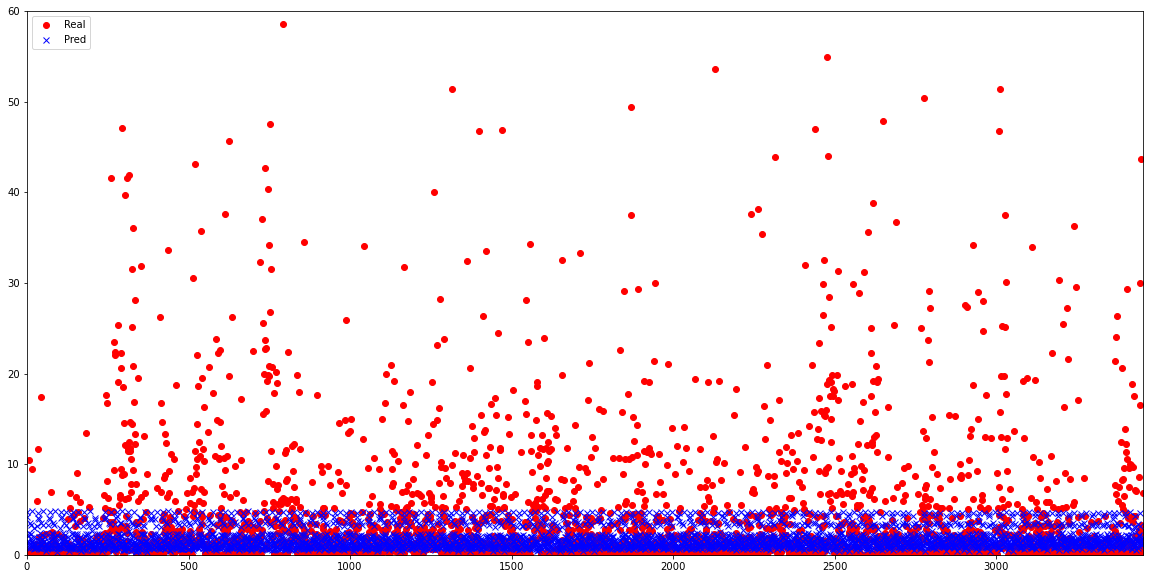

In [205]:
# JUST PLOT

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

# Get RMSE - PRICE

In [206]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))

tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()

# Item - RMSE
import scipy.stats
rmse_list_item = []
std_list_item = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
#     print(ground_truth)
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item.append(rmse)
    std_list_item.append(std)
    
    
# Country - RMSE
rmse_list_country = []
std_list_country = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country.append(rmse)
    std_list_country.append(std)
    


# GET RMSE - percentage

In [207]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()


# Item - RMSE
import scipy.stats
rmse_list_item_p = []
std_list_item_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item_p.append(rmse)
    std_list_item_p.append(std)
    
    
# Country - RMSE
rmse_list_country_p = []
std_list_country_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country_p.append(rmse)
    std_list_country_p.append(std)
    


In [208]:
loss_item.append(np.mean(rmse_list_item))
std_item.append(np.mean(std_list_item))
loss_country.append(np.mean(rmse_list_country))
std_country.append(np.mean(std_list_country))


loss_item_p.append(np.mean(rmse_list_item_p))
std_item_p.append(np.mean(std_list_item_p))
loss_country_p.append(np.mean(rmse_list_country_p))
std_country_p.append(np.mean(std_list_country_p))

In [209]:
line_loss_item.append(rmse_list_item)
line_loss_country.append(rmse_list_country)
line_loss_item_p.append(rmse_list_item_p)
line_loss_country_p.append(rmse_list_country_p)

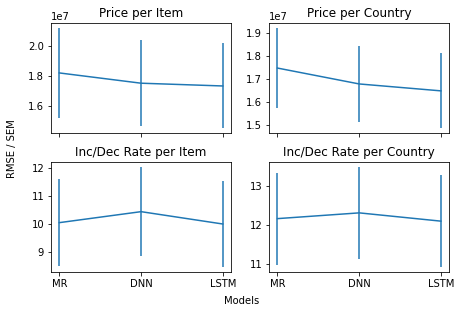

In [253]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    x = ['MR', 'DNN', 'LSTM']
    fig, ax = plt.subplots(2,2, sharex=True, squeeze=True, constrained_layout=True)
    ax[0][0].errorbar(x, loss_item, yerr=std_item)
    ax[0][0].set_title('Price per Item')

    ax[0][1].errorbar(x, loss_country, yerr=std_country)
    ax[0][1].set_title('Price per Country')

    ax[1][0].errorbar(x, loss_item_p, yerr=std_item_p)
    ax[1][0].set_title('Inc/Dec Rate per Item')

    ax[1][1].errorbar(x, loss_country_p, yerr=std_country_p)
    ax[1][1].set_title('Inc/Dec Rate per Country')
    fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
    fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()

In [ ]:
# line_loss_item.append(rmse_list_item)
# line_loss_country.append(rmse_list_country)
# line_loss_item_p.append(rmse_list_item_p)
# line_loss_country_p.append(rmse_list_country_p)

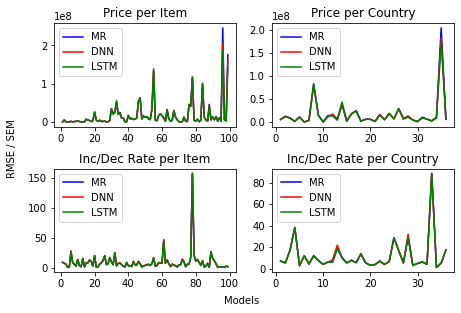

In [254]:
if not init_flag:
    fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True)
    
    x = [i for i in range(1, len(line_loss_item[0])+1)]
    ax[0][0].plot(x, line_loss_item[0], 'b', label='MR')
    ax[0][0].plot(x, line_loss_item[1], 'r', label='DNN')
    ax[0][0].plot(x, line_loss_item[2], 'g', label='LSTM')
    ax[0][0].set_title('Price per Item')
    ax[0][0].legend()

    x = [i for i in range(1, len(line_loss_country[0])+1)]
    ax[0][1].plot(x, line_loss_country[0], 'b', label='MR')
    ax[0][1].plot(x, line_loss_country[1], 'r', label='DNN')
    ax[0][1].plot(x, line_loss_country[2], 'g', label='LSTM')
    ax[0][1].set_title('Price per Country')
    ax[0][1].legend()

    x = [i for i in range(1, len(line_loss_item_p[0])+1)]
    ax[1][0].plot(x, line_loss_item_p[0], 'b', label='MR')
    ax[1][0].plot(x, line_loss_item_p[1], 'r', label='DNN')
    ax[1][0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
    ax[1][0].set_title('Inc/Dec Rate per Item')
    ax[1][0].legend()

    x = [i for i in range(1, len(line_loss_country_p[0])+1)]
    ax[1][1].plot(x, line_loss_country_p[0], 'b', label='MR')
    ax[1][1].plot(x, line_loss_country_p[1], 'r', label='DNN')
    ax[1][1].plot(x, line_loss_country_p[2], 'g', label='LSTM')
    ax[1][1].set_title('Inc/Dec Rate per Country')
    ax[1][1].legend()

    fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
    fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    plt.show()

In [180]:
loss_item

[18201972.380751327, 17523836.001432333, 17341233.689033713]

In [86]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))
LSTM_loss, LSTM_std = RMSELoss(pred_y, y_test)


In [89]:
MR_loss

tensor(19.5296, device='cuda:0', grad_fn=<SqrtBackward>)

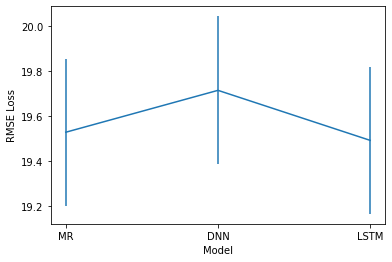

In [97]:
# MR_loss = 0
# MR_std = 0
# LSTM_loss = 0
# LSTM_std = 0
# DNN_loss = 0
# DNN_std = 0

# plt.errorbar([1,2,3], [MR_loss.item, DNN_loss, LSTM_loss], yerr = [MR_std, DNN_std, LSTM_std])
# plt.show()

plot_loss_list = []
plot_sem_list = []

plt.ylabel('RMSE Loss')
plt.xlabel('Model')
plt.errorbar(["MR","DNN","LSTM"], [MR_loss.item(), DNN_loss.item(), LSTM_loss.item()], yerr = [MR_std.item()/np.sqrt(len(pred_y)), DNN_std.item()/np.sqrt(len(pred_y)), LSTM_std.item()/np.sqrt(len(pred_y))])
plt.show()

In [29]:
import seaborn as sns
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
diff_list_L2 = np.array(diff_list_L2)

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



## IQR

In [ ]:
diff_list_L2 = np.sort(diff_list_L2)

In [ ]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

In [ ]:
r_l2.mean()

In [ ]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [ ]:
transforms = [hl.transforms.Prune('Constant')]

In [ ]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

In [ ]:
graph.them = hl.graph.THEMES['blue'].copy()

In [ ]:
graph

In [ ]:
# !pip install torchviz

In [ ]:
from torchviz import make_dot

In [ ]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

In [ ]:
from torchsummary import summary
summary(deepmodel, (df.shape[1]-1,))

In [ ]:
!pip install torchsummary